# COS-Holes CIV and SiIV Statistical Tests

## Radial Profiles

Basing code off of https://github.com/Deech08/HST_MagellanicCorona/blob/main/Figure_2.ipynb

From Krishnarao et al. 2022 (https://www.nature.com/articles/s41586-022-05090-5#Sec2) and advice from Bordoloi and at AAS 241, going to see if I can make radial profiles for my small data set as well as confidence intervals 

--------------------------

Info for packages: 
- pymccorrelation: https://github.com/privong/pymccorrelation 
- linmix: https://linmix.readthedocs.io/en/latest/install.html#installing
    - https://github.com/jmeyers314/linmix

In [1]:
#These are straight from Krishnarao + 2022 

import numpy as np
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy.table import QTable
#%matplotlib notebook

import seaborn as sns
pal = sns.color_palette("pastel")

import pickle

from pymccorrelation import pymccorrelation
import linmix

from scipy.stats import kendalltau
from seaborn.algorithms import bootstrap

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#From my previous list of things
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 35

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 18,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 10,
          'xtick.minor.size': 6,
          'ytick.major.size': 10,
          'ytick.minor.size': 6}
plt.rcParams.update(params)

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/matplotlib_inline/config.py:75: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


In [2]:
#Bring in all the COS-Holes fit data
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159/all_vp.csv')
all_vp_df_J1222 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1222/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

#### CIV COS-Holes Data and CIV Simulations

In [3]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

gal_df_J1101 = all_vp_df_J1101.loc[(all_vp_df_J1101['trans']=='C IV')]

#J1101 Values to make new pd df
trans_J1101 = np.array(gal_df_J1101['trans'])
zsys_J1101 = np.array(gal_df_J1101['zsys'])
N_J1101 = np.array(gal_df_J1101['col'])
sigN_J1101 = np.array(gal_df_J1101['sigcol'])
b_J1101 = np.array(gal_df_J1101['bval'])
sigb_J1101 = np.array(gal_df_J1101['sigbval'])
vel_J1101 = np.array(gal_df_J1101['vel'])
sigvel_J1101 = np.array(gal_df_J1101['sigvel'])
wav_J1101 = np.array(gal_df_J1101['restwave'])

#smaller df 
civ_df_J1101= pd.DataFrame({"Line":trans_J1101, "Wavelength":wav_J1101, "zsys":zsys_J1101, "N":N_J1101, "sigN":sigN_J1101, 
                   "b":b_J1101, "sigb":sigb_J1101, "vel":vel_J1101, "sigvel":sigvel_J1101})
civ_df_J1101

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00004,13.954,0.029,44.1,3.845,-1.221,2.681
1,C IV,1550.781,0.00004,13.954,0.000,44.1,0.000,-1.221,0.000
2,C IV,1548.204,0.00047,13.482,0.068,20.0,5.285,-1.909,3.358
3,C IV,1550.781,0.00047,13.482,0.000,20.0,0.000,-1.909,0.000
4,C IV,1548.204,0.00223,13.403,0.099,35.7,11.549,2.357,7.816
5,C IV,1550.781,0.00223,13.403,0.000,35.7,0.000,2.357,0.000


In [4]:
gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='C IV')]

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
sigN_J1159 = np.array(gal_df_J1159['sigcol'])
b_J1159 = np.array(gal_df_J1159['bval'])
sigb_J1159 = np.array(gal_df_J1159['sigbval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
sigvel_J1159 = np.array(gal_df_J1159['sigvel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#smaller df 
civ_df_J1159= pd.DataFrame({"Line":trans_J1159, "Wavelength":wav_J1159, "zsys":zsys_J1159, "N":N_J1159, "sigN":sigN_J1159, 
                   "b":b_J1159, "sigb":sigb_J1159, "vel":vel_J1159, "sigvel":sigvel_J1159})
civ_df_J1159

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00330,13.697,0.074,80.715,17.306,-9.444,12.162
1,C IV,1550.781,0.00330,13.697,0.000,80.715,0.000,-9.444,0.000
2,C IV,1548.204,-0.00012,14.166,0.022,58.259,3.748,-12.256,2.552
3,C IV,1550.781,-0.00012,14.166,0.000,58.259,0.000,-12.256,0.000


In [5]:
gal_df_J1222 = all_vp_df_J1222.loc[(all_vp_df_J1222['trans']=='C IV')] 

#J1222 Values 
trans_J1222 = np.array(gal_df_J1222['trans'])
zsys_J1222 = np.array(gal_df_J1222['zsys'])
N_J1222 = np.array(gal_df_J1222['col'])
sigN_J1222 = np.array(gal_df_J1222['sigcol'])
b_J1222 = np.array(gal_df_J1222['bval'])
sigb_J1222 = np.array(gal_df_J1222['sigbval'])
vel_J1222 = np.array(gal_df_J1222['vel'])
sigvel_J1222 = np.array(gal_df_J1222['sigvel'])
wav_J1222 = np.array(gal_df_J1222['restwave'])

#smaller df  
civ_df_J1222= pd.DataFrame({"Line":trans_J1222, "Wavelength":wav_J1222, "zsys":zsys_J1222, "N":N_J1222, "sigN":sigN_J1222, 
                   "b":b_J1222, "sigb":sigb_J1222, "vel":vel_J1222, "sigvel":sigvel_J1222})
civ_df_J1222

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00012,14.49,0.024,66.143,3.859,10.042,2.992
1,C IV,1550.781,-0.00012,14.49,0.000,66.143,0.000,10.042,0.000


In [6]:
gal_df_J1249 = all_vp_df_J1249.loc[(all_vp_df_J1249['trans']=='C IV')]

#J1249 Values 
trans_J1249 = np.array(gal_df_J1249['trans'])
zsys_J1249 = np.array(gal_df_J1249['zsys'])
N_J1249 = np.array(gal_df_J1249['col'])
sigN_J1249 = np.array(gal_df_J1249['sigcol'])
b_J1249 = np.array(gal_df_J1249['bval'])
sigb_J1249 = np.array(gal_df_J1249['sigbval'])
vel_J1249 = np.array(gal_df_J1249['vel'])
sigvel_J1249 = np.array(gal_df_J1249['vel'])
wav_J1249 = np.array(gal_df_J1249['restwave'])

#smaller df 
civ_df_J1249= pd.DataFrame({"Line":trans_J1249, "Wavelength":wav_J1249, "zsys":zsys_J1249, "N":N_J1249, "sigN":sigN_J1249, 
                   "b":b_J1249, "sigb":sigb_J1249, "vel":vel_J1249, "sigvel":sigvel_J1249})
civ_df_J1249

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00013,14.190,0.032,41.390,3.687,9.199,9.199
1,C IV,1550.781,-0.00013,14.190,0.000,41.390,0.000,9.199,9.199
2,C IV,1548.204,0.00051,13.855,0.052,34.300,6.220,11.655,11.655
3,C IV,1550.781,0.00051,13.855,0.000,34.300,0.000,11.655,11.655
4,C IV,1548.204,0.00081,13.652,0.103,10.925,4.852,-2.260,-2.260
5,C IV,1550.781,0.00081,13.652,0.000,10.925,0.000,-2.260,-2.260
6,C IV,1548.204,0.00109,13.946,0.044,30.000,4.293,-11.070,-11.070
7,C IV,1550.781,0.00109,13.946,0.000,30.000,0.000,-11.070,-11.070


In [7]:
gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='C IV')] 

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
sigN_J1051 = np.array(gal_df_J1051['sigcol'])
b_J1051 = np.array(gal_df_J1051['bval'])
sigb_J1051 = np.array(gal_df_J1051['sigbval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
sigvel_J1051 = np.array(gal_df_J1051['sigvel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#smaller df 
civ_df_J1051= pd.DataFrame({"Line":trans_J1051, "Wavelength":wav_J1051, "zsys":zsys_J1051, "N":N_J1051, "sigN":sigN_J1051, 
                   "b":b_J1051, "sigb":sigb_J1051, "vel":vel_J1051, "sigvel":sigvel_J1051})
civ_df_J1051

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00042,13.985,0.060,34.264,6.485,27.736,4.551
1,C IV,1550.781,-0.00042,13.985,0.000,34.264,0.000,27.736,0.000
2,C IV,1548.204,-0.00003,14.012,0.064,39.000,8.952,6.465,4.749
3,C IV,1550.781,-0.00003,14.012,0.000,39.000,0.000,6.465,0.000
4,C IV,1548.204,0.00026,13.388,0.153,27.700,14.962,16.652,9.372
5,C IV,1550.781,0.00026,13.388,0.000,27.700,0.000,16.652,0.000
6,C IV,1548.204,0.00442,13.990,0.057,32.780,5.621,6.646,3.813
7,C IV,1550.781,0.00442,13.990,0.000,32.780,0.000,6.646,0.000


In [8]:
gal_df_J1123 = all_vp_df_J1123.loc[(all_vp_df_J1123['trans']=='C IV')]

#J1123 Values 
trans_J1123 = np.array(gal_df_J1123['trans'])
zsys_J1123 = np.array(gal_df_J1123['zsys'])
N_J1123 = np.array(gal_df_J1123['col'])
sigN_J1123 = np.array(gal_df_J1123['sigcol'])
b_J1123 = np.array(gal_df_J1123['bval'])
sigb_J1123 = np.array(gal_df_J1123['sigbval'])
vel_J1123 = np.array(gal_df_J1123['vel'])
sigvel_J1123 = np.array(gal_df_J1123['sigvel'])
wav_J1123 = np.array(gal_df_J1123['restwave'])

#smaller df 
civ_df_J1123= pd.DataFrame({"Line":trans_J1123, "Wavelength":wav_J1123, "zsys":zsys_J1123, "N":N_J1123, "sigN":sigN_J1123, 
                   "b":b_J1123, "sigb":sigb_J1123, "vel":vel_J1123, "sigvel":sigvel_J1123})
civ_df_J1123

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00015,14.171,0.051,56.626,8.100,-23.197,5.747
1,C IV,1550.781,0.00015,14.171,0.000,56.626,0.000,-23.197,0.000
2,C IV,1548.204,0.00275,14.012,0.076,85.000,17.787,-21.098,12.763
3,C IV,1550.781,0.00275,14.012,0.000,85.000,0.000,-21.098,0.000


In [9]:
gal_df_J0246 = all_vp_df_J0246.loc[(all_vp_df_J0246['trans']=='C IV')] 

#J0246 Values 
trans_J0246= np.array(gal_df_J0246['trans'])
zsys_J0246 = np.array(gal_df_J0246['zsys'])
N_J0246 = np.array(gal_df_J0246['col'])
sigN_J0246 = np.array(gal_df_J0246['sigcol'])
b_J0246 = np.array(gal_df_J0246['bval'])
sigb_J0246 = np.array(gal_df_J0246['sigbval'])
vel_J0246 = np.array(gal_df_J0246['vel'])
sigvel_J0246 = np.array(gal_df_J0246['sigvel'])
wav_J0246 = np.array(gal_df_J0246['restwave'])

#smaller df 
civ_df_J0246= pd.DataFrame({"Line":trans_J0246, "Wavelength":wav_J0246, "zsys":zsys_J0246, "N":N_J0246, "sigN":sigN_J0246, 
                   "b":b_J0246, "sigb":sigb_J0246, "vel":vel_J0246, "sigvel":sigvel_J0246})
civ_df_J0246

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,0.00009,14.078,0.049,33.147,4.818,-12.12,3.293
1,C IV,1550.781,0.00009,14.078,0.000,33.147,0.000,-12.12,0.000
2,C IV,1548.204,0.00422,14.211,0.053,54.100,7.973,18.21,5.687
3,C IV,1550.781,0.00422,14.211,0.000,54.100,0.000,18.21,0.000


In [10]:
gal_df_J1235 = all_vp_df_J1235.loc[(all_vp_df_J1235['trans']=='C IV')]

#J1235 Values 
trans_J1235= np.array(gal_df_J1235['trans'])
zsys_J1235 = np.array(gal_df_J1235['zsys'])
N_J1235 = np.array(gal_df_J1235['col'])
sigN_J1235 = np.array(gal_df_J1235['sigcol'])
b_J1235 = np.array(gal_df_J1235['bval'])
sigb_J1235 = np.array(gal_df_J1235['sigbval'])
vel_J1235 = np.array(gal_df_J1235['vel'])
sigvel_J1235 = np.array(gal_df_J1235['sigvel'])
wav_J1235 = np.array(gal_df_J1235['restwave'])

#smaller df - REMEMBER THIS IS A NON DETECTION
civ_df_J1235= pd.DataFrame({"Line":trans_J1235, "Wavelength":wav_J1235, "zsys":zsys_J1235, "N":N_J1235, "sigN":sigN_J1235, 
                   "b":b_J1235, "sigb":sigb_J1235, "vel":vel_J1235, "sigvel":sigvel_J1235})
civ_df_J1235

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,C IV,1548.204,-0.00001,14.218,0.029,48.143,3.92,18.541,2.873
1,C IV,1550.781,-0.00001,14.218,0.000,48.143,0.00,18.541,0.000


In [11]:
#Known Galaxy Information

gal_param_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/gal_param.csv')
gal_param_df

,galaxy,stellar mass,BH mass,halo mass,Rvir,Rproj,angle
0,NGC3489,10.20,6.770,11.782755,273.43553,110.019140,331.268580
1,NGC4026,10.43,8.255,11.964435,314.35077,37.385240,22.685004
2,NGC4258,10.88,7.577,12.522479,482.42196,69.778997,208.535150
3,NGC4258,10.88,7.577,12.522479,482.42196,130.305660,206.816170
4,NGC4736,10.62,6.830,12.154667,363.76792,25.520224,41.789694
5,NGC3414,10.79,8.400,12.377581,431.64653,40.499140,0.885271
6,NGC3627,10.84,6.920,12.455645,458.29968,119.976000,267.760040
7,NGC1097,10.50,8.140,12.029020,330.32571,55.657239,322.869730
8,NGC4564,10.40,7.940,11.938382,308.12739,123.078500,224.489670


In [12]:
#getting them out of the table 
gal = np.array(gal_param_df['galaxy'])
s_mass = np.array(gal_param_df['stellar mass'])
bh_mass = np.array(gal_param_df['BH mass'])
rvir = np.array(gal_param_df['Rvir'])
rproj = np.array(gal_param_df['Rproj'])

In [13]:
#Nicole Data (CHaNGA Models)

R25_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_highMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_HMbh_civ'])
R25_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_lowMbh_logN_CIV.txt', 
                           sep=" ", header=None, names =['R25_LMbh_civ'])
R25_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/R25_RoverRvir.txt', 
                       sep=" ", header=None, names =['R25_RpRv'])

R25_df = pd.concat([R25_HMbh_civ, R25_LMbh_civ, R25_RpRv], axis=1, join='inner')
R25_df

,R25_HMbh_civ,R25_LMbh_civ,R25_RpRv
0,11.828552,12.683522,0.000000
1,12.003941,12.746611,0.008081
2,12.049706,13.078299,0.016162
3,12.066849,13.180826,0.024242
4,12.102844,13.089614,0.032323
...,...,...,...
95,10.736462,9.575072,0.767677
96,10.657459,9.445246,0.775758
97,10.619149,9.426555,0.783838
98,10.589303,9.354894,0.791919


In [14]:
#getting them out of the table
r25_highBH_civ = np.array(R25_df['R25_HMbh_civ'])
r25_lowBH_civ = np.array(R25_df['R25_LMbh_civ'])
r25_rprv = np.array(R25_df['R25_RpRv'])

In [15]:
#THIS IS THE NEW DATA THAT NICOLE SENT ME THAT IS JUST STARFORMING GALAXIES SO THAT WE CAN SEE THE DIFFERENCES 

#bringing in Nicole data 
COSChaNGA_HMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_highMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_HMbh_civ'])
COSChaNGA_LMbh_civ = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_lowMbh_logN_CIV.txt', sep=" ", header=None, names =['CC_LMbh_civ'])
COSChaNGA_RpRv = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/COSholes_ChaNGa_RoverRvir.txt', sep=" ", header=None, names =['CC_RpRv'])

#taking them out to plot
CC_highBH_civ = np.array(COSChaNGA_HMbh_civ['CC_HMbh_civ'])
CC_lowBH_civ = np.array(COSChaNGA_LMbh_civ['CC_LMbh_civ'])
CC_rprv = np.array(COSChaNGA_RpRv['CC_RpRv'])

In [16]:
#Ben Data (EAGLE Models)  

BenHbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/high-M_SMBH_ben.csv')

b_benHbh = np.array(BenHbh_df['#b'])
med_benHbh = np.array(BenHbh_df['median'])
ben_25Hbh = np.array(BenHbh_df['25percentile'])
ben_75Hbh = np.array(BenHbh_df['75percentile'])

BenLbh_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/low-M_SMBH_ben.csv')

b_benLbh = np.array(BenLbh_df['#b'])
med_benLbh = np.array(BenLbh_df['median'])
ben_25Lbh = np.array(BenLbh_df['25percentile'])
ben_75Lbh = np.array(BenLbh_df['75percentile'])

#### SiIV COS-Holes Data

In [17]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

#DETECTIONS

gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='SiIV')]

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
sigN_J1159 = np.array(gal_df_J1159['sigcol'])
b_J1159 = np.array(gal_df_J1159['bval'])
sigb_J1159 = np.array(gal_df_J1159['sigbval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
sigvel_J1159 = np.array(gal_df_J1159['sigvel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#smaller df 
siiv_df_J1159= pd.DataFrame({"Line":trans_J1159, "Wavelength":wav_J1159, "zsys":zsys_J1159, "N":N_J1159, "sigN":sigN_J1159, 
                   "b":b_J1159, "sigb":sigb_J1159, "vel":vel_J1159, "sigvel":sigvel_J1159})
siiv_df_J1159

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,SiIV,1393.7602,-0.00014,13.471,0.035,45.5,4.934,-18.759,3.436
1,SiIV,1402.7729,-0.00014,13.471,0.000,45.5,0.000,-18.759,0.000
2,SiIV,1393.7602,0.00291,12.731,0.124,20.0,10.033,-3.131,6.007
3,SiIV,1402.7729,0.00291,12.731,0.000,20.0,0.000,-3.131,0.000
4,SiIV,1393.7602,0.00334,13.051,0.089,53.3,14.700,-4.440,9.630
5,SiIV,1402.7729,0.00334,13.051,0.000,53.3,0.000,-4.440,0.000


In [18]:
gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='SiIV')] 

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
sigN_J1051 = np.array(gal_df_J1051['sigcol'])
b_J1051 = np.array(gal_df_J1051['bval'])
sigb_J1051 = np.array(gal_df_J1051['sigbval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
sigvel_J1051 = np.array(gal_df_J1051['sigvel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#smaller df 
siiv_df_J1051= pd.DataFrame({"Line":trans_J1051, "Wavelength":wav_J1051, "zsys":zsys_J1051, "N":N_J1051, "sigN":sigN_J1051, 
                   "b":b_J1051, "sigb":sigb_J1051, "vel":vel_J1051, "sigvel":sigvel_J1051})
siiv_df_J1051

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,SiIV,1393.7602,0.00415,13.110,0.068,17.800,4.745,6.094,2.990
1,SiIV,1402.7729,0.00415,13.110,0.000,17.800,0.000,6.094,0.000
2,SiIV,1393.7602,0.00448,13.504,0.035,35.298,4.077,-9.390,2.637
3,SiIV,1402.7729,0.00448,13.504,0.000,35.298,0.000,-9.390,0.000
4,SiIV,1393.7602,-0.00014,13.509,0.045,85.000,10.718,-11.718,7.440
5,SiIV,1402.7729,-0.00014,13.509,0.000,85.000,0.000,-11.718,0.000
6,SiIV,1393.7602,0.00635,13.078,0.082,31.300,8.167,14.452,5.565
7,SiIV,1402.7729,0.00635,13.078,0.000,31.300,0.000,14.452,0.000


In [19]:
#COS-Holes Non Detections 

#Known Galaxy Information

siiv_uplim_df = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/SiIV_upper_limits_updated.csv')
siiv_uplims = np.array(siiv_uplim_df['SiIV_Uplims'])
siiv_uplim_df

,Unnamed: 0,SiIV_Uplims
0,0,12.54
1,1,12.55
2,2,12.83
3,3,13.20
4,4,12.75
5,5,12.70


## Statistical Tests

This is copied straight from the github... I want to put lots of comments and see if I can understand what it is doing and made some modifications so that it fit for the variables and data that I am using 

In [20]:
#All of the data so far formulated in a way that is similar to Krishnarao 2022
civd = {'galaxy': [gal_param_df['galaxy'][0], gal_param_df['galaxy'][1], gal_param_df['galaxy'][3], gal_param_df['galaxy'][4],
     gal_param_df['galaxy'][5], gal_param_df['galaxy'][6], gal_param_df['galaxy'][7], gal_param_df['galaxy'][8]], 
     'QSOname': ['1101', '1159', '1222', '1249', '1051', '1123', '0246', '1235'],
    'BHmass': [bh_mass[0], bh_mass[1], bh_mass[3], bh_mass[4], bh_mass[5], bh_mass[6], bh_mass[7], bh_mass[8]],
    'Smass': [s_mass[0], s_mass[1], s_mass[3], s_mass[4], s_mass[5], s_mass[6], s_mass[7], s_mass[8]],
    'Rproj': [gal_param_df['Rproj'][0], gal_param_df['Rproj'][1], gal_param_df['Rproj'][3], gal_param_df['Rproj'][4],
     gal_param_df['Rproj'][5], gal_param_df['Rproj'][6], gal_param_df['Rproj'][7], gal_param_df['Rproj'][8]],
    'Rvir': [gal_param_df['Rvir'][0], gal_param_df['Rvir'][1], gal_param_df['Rvir'][3], gal_param_df['Rvir'][4],
     gal_param_df['Rvir'][5], gal_param_df['Rvir'][6], gal_param_df['Rvir'][7], gal_param_df['Rvir'][8]], 
    'CIVN': [civ_df_J1101['N'][4], civ_df_J1159['N'][0], np.log10(10**13.5), 
            np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
            civ_df_J1051['N'][6], civ_df_J1123['N'][2], civ_df_J0246['N'][2], np.log10(10**13.36)],
    'CIVsigN': [civ_df_J1101['sigN'][4], civ_df_J1159['sigN'][0], -0.001, 
               np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
               civ_df_J1051['sigN'][6], civ_df_J1123['sigN'][2], civ_df_J0246['sigN'][2], -0.001]}
CIVDF = pd.DataFrame(data=civd)
CIVDF

,galaxy,QSOname,BHmass,Smass,Rproj,Rvir,CIVN,CIVsigN
0,NGC3489,1101,6.770,10.20,110.019140,273.43553,13.403000,0.099000
1,NGC4026,1159,8.255,10.43,37.385240,314.35077,13.697000,0.074000
2,NGC4258,1222,7.577,10.88,130.305660,482.42196,13.500000,-0.001000
3,NGC4736,1249,6.830,10.62,25.520224,363.76792,14.311323,0.123487
4,NGC3414,1051,8.400,10.79,40.499140,431.64653,13.990000,0.057000
5,NGC3627,1123,6.920,10.84,119.976000,458.29968,14.012000,0.076000
6,NGC1097,0246,8.140,10.50,55.657239,330.32571,14.211000,0.053000
7,NGC4564,1235,7.940,10.40,123.078500,308.12739,13.360000,-0.001000


In [21]:
siivd = {'galaxy': [gal_param_df['galaxy'][0], gal_param_df['galaxy'][1], gal_param_df['galaxy'][3], gal_param_df['galaxy'][4],
     gal_param_df['galaxy'][5], gal_param_df['galaxy'][6], gal_param_df['galaxy'][7], gal_param_df['galaxy'][8]], 
     'QSOname': ['1101', '1159', '1222', '1249', '1051', '1123', '0246', '1235'], 
    'BHmass': [bh_mass[0], bh_mass[1], bh_mass[3], bh_mass[4], bh_mass[5], bh_mass[6], bh_mass[7], bh_mass[8]],
    'Smass': [s_mass[0], s_mass[1], s_mass[3], s_mass[4], s_mass[5], s_mass[6], s_mass[7], s_mass[8]],
    'Rproj': [gal_param_df['Rproj'][0], gal_param_df['Rproj'][1], gal_param_df['Rproj'][3], gal_param_df['Rproj'][4],
     gal_param_df['Rproj'][5], gal_param_df['Rproj'][6], gal_param_df['Rproj'][7], gal_param_df['Rproj'][8]],
    'Rvir': [gal_param_df['Rvir'][0], gal_param_df['Rvir'][1], gal_param_df['Rvir'][3], gal_param_df['Rvir'][4],
     gal_param_df['Rvir'][5], gal_param_df['Rvir'][6], gal_param_df['Rvir'][7], gal_param_df['Rvir'][8]], 
         'SiIVN': [siiv_uplims[0], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), siiv_uplims[5], 
                 siiv_uplims[1], siiv_df_J1051['N'][2], siiv_uplims[2], siiv_uplims[3], siiv_uplims[4]],
        'SiIVsigN': [-0.001, np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), -0.001, -0.001, 
                    siiv_df_J1051['sigN'][2], -0.001, -0.001, -0.001]}
SiIVDF = pd.DataFrame(data=siivd)
SiIVDF

,galaxy,QSOname,BHmass,Smass,Rproj,Rvir,SiIVN,SiIVsigN
0,NGC3489,1101,6.770,10.20,110.019140,273.43553,12.54000,-0.001000
1,NGC4026,1159,8.255,10.43,37.385240,314.35077,13.22086,0.152634
2,NGC4258,1222,7.577,10.88,130.305660,482.42196,12.70000,-0.001000
3,NGC4736,1249,6.830,10.62,25.520224,363.76792,12.55000,-0.001000
4,NGC3414,1051,8.400,10.79,40.499140,431.64653,13.50400,0.035000
5,NGC3627,1123,6.920,10.84,119.976000,458.29968,12.83000,-0.001000
6,NGC1097,0246,8.140,10.50,55.657239,330.32571,13.20000,-0.001000
7,NGC4564,1235,7.940,10.40,123.078500,308.12739,12.75000,-0.001000


#### All the Data and comparing CIV and SiIV (I think)

In [47]:
# Replicating this for my data using the code that I already have listed for ALL of the points in the data 

##### CIV #####

XX =  np.copy(CIVDF['Rproj']) #Getting the impact parameter from my galaxy parameters table 
YY = np.copy(CIVDF["CIVN"]) #getting the column density of CIV from main data table 
YY_err = np.copy(CIVDF["CIVsigN"]) #column density error of CIV 
has_UL = YY_err < 0 #determining the ones that have upper limts (in his table they are denoted with -1 in the error column) T/F

Ylim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)
Ylim[has_UL] = 1 #if this array has a -1 values (upper limit) then it is given the value of 1 
Xlim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)

coeff = "kendallt" # the correlation coefficient 
Nboot = 10_000 #number of bootstrapping iterations over which the uncertainties are estimated 

xC = XX #same as XX => impact parameters 
yC = YY #same as YY => column densities 
yC_err = YY_err #same as YY_err => column density error 
xlimC = Xlim #array of 0s same length as XX or Xlim 
ylimC = Ylim #array od 0s and 1s same length as YY or Ylim (1 if it is an upper limit)

# Correlation Test for Si
    #rest is a tuple of length 2 that has 2 elements 
        #i) numpy array with the corelation coeffecient percentiles (by default it is 16%, 50%, and 84%)
        #ii) numpy array with the p-value percentiles by default it is 16%, 50%, and 84%)
    #Additionally, if the full posterior distribution is desired, that can be obtained by setting the return_dist keyword 
     #argument to True. In that case, res becomes a tuple of length four:
        #i) numpy array with the corelation coeffecient percentiles (by default it is 16%, 50%, and 84%)
        #ii) numpy array with the p-value percentiles by default it is 16%, 50%, and 84%)
        #iii) numpy array with full set of correlation coefficient values from the bootstrapping
        #iv) numpy array with the full set of p-values computed from the bootstrapping
   
    # Please see the docstring for the full set of arguments and information including measurement uncertainties 
    # (necessary for point perturbation) and for marking censored data.

kwargs = {"return_dist":True}
res = pymccorrelation(xC, yC, xlim = xlimC, ylim = ylimC, coeff = coeff, Nboot = Nboot, **kwargs)

outC = {} #Where the stat information is stored 

outC["coeff_percentiles"] = res[0]
outC["p-value_percentiles"] = res[1]
outC["coeff_dist"] = res[2]
outC["p-value_dist"] = res[3]

##### SiIV #####

XX =  np.copy(SiIVDF['Rproj']) #Getting the impact parameter from my galaxy parameters table 
YY = np.copy(SiIVDF["SiIVN"]) #getting the column density of CIV from main data table 
YY_err = np.copy(SiIVDF["SiIVsigN"]) #column density error of CIV 
has_UL = YY_err < 0 #determining the ones that have upper limts (in his table they are denoted with -1 in the error column) T/F

Ylim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)
Ylim[has_UL] = 1 #if this array has a -number values (upper limit) then it is given the value of 1 
Xlim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)

coeff = "kendallt" # the correlation coefficient 
Nboot = 10_000 #number of bootstrapping iterations over which the uncertainties are estimated 

xS = XX #same as XX => impact parameters 
yS = YY #same as YY => column densities 
yS_err = YY_err #same as YY_err => column density error 
xlimS = Xlim #array of 0s same length as XX or Xlim 
ylimS = Ylim #array od 0s and 1s same length as YY or Ylim (1 if it is an upper limit)

kwargs = {"return_dist":True}
res = pymccorrelation(xS, yS, xlim = xlimS, ylim = ylimS, coeff = coeff, Nboot = Nboot, **kwargs)

outS = {}

outS["coeff_percentiles"] = res[0]
outS["p-value_percentiles"] = res[1]
outS["coeff_dist"] = res[2]
outS["p-value_dist"] = res[3]

#Running the actual stats? 

'''mc_data = {
    "Ion":np.concatenate([["CIV"]*len(outC["coeff_dist"]),["SiIV"]*len(outS["coeff_dist"])]),
    r"Kendall's $\tau$":np.concatenate([outC["coeff_dist"], outS["coeff_dist"]]),
    r"$\log_{10}$(p-value)":np.log10(np.concatenate([outC["p-value_dist"], outS["p-value_dist"]]))
}'''

mc_data = {
    "Ion":["CIV"]*len(outC["coeff_dist"]),
    r"Kendall's $\tau$":outC["coeff_dist"],
    r"$\log_{10}$(p-value)":np.log10(outC["p-value_dist"])
}

<>:83: DeprecationWarning: invalid escape sequence \l
<>:83: DeprecationWarning: invalid escape sequence \l
<>:83: DeprecationWarning: invalid escape sequence \l
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/701629517.py:83: DeprecationWarning: invalid escape sequence \l
  }'''
/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/pymccorrelation/pymccorrelation.py:161: RuntimeWarning: invalid value encountered in double_scalars
  z = S/ _np.sqrt(var)


#### All the Data but using Rproj/Rvir 

In [48]:
##### CIV #####

XX =  np.copy(CIVDF['Rproj']/CIVDF['Rvir']) #Getting the impact parameter from my galaxy parameters table 
YY = np.copy(CIVDF["CIVN"]) #getting the column density of CIV from main data table 
YY_err = np.copy(CIVDF["CIVsigN"]) #column density error of CIV 
has_UL = YY_err < 0 #determining the ones that have upper limts (in his table they are denoted with -1 in the error column) T/F

Ylim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)
Ylim[has_UL] = 1 #if this array has a -1 values (upper limit) then it is given the value of 1 
Xlim = np.zeros_like(XX, dtype = int) #Return an array of zeros with the same shape and type as the impact parameters (XX)

coeff = "kendallt" # the correlation coefficient 
Nboot = 10_000 #number of bootstrapping iterations over which the uncertainties are estimated 

xCrr = XX #same as XX => impact parameters 
yCrr = YY #same as YY => column densities 
yCrr_err = YY_err #same as YY_err => column density error 
xlimCrr = Xlim #array of 0s same length as XX or Xlim 
ylimCrr = Ylim #array od 0s and 1s same length as YY or Ylim (1 if it is an upper limit)

kwargs = {"return_dist":True}
res = pymccorrelation(xCrr, yCrr, xlim = xlimCrr, ylim = ylimCrr, coeff = coeff, Nboot = Nboot, **kwargs)

outCrr = {} #Where the stat information is stored 

outCrr["coeff_percentiles"] = res[0]
outCrr["p-value_percentiles"] = res[1]
outCrr["coeff_dist"] = res[2]
outCrr["p-value_dist"] = res[3]

mc_datarr = {
    "Ion":["CIV"]*len(outCrr["coeff_dist"]),
    r"Kendall's $\tau$":outCrr["coeff_dist"],
    r"$\log_{10}$(p-value)":np.log10(outCrr["p-value_dist"])
}

#### Splitting the CIV measurements into the low and high mass bins so that I can compare them later (I think)

### LINEAR REGRESSION

#### All the Data using Rproj 

In [49]:
# LINEAR REGRESSION FOR ALL THE DATA

##### CIV #####

upper_lim_C = yC_err < 0 #a mask to find the upper limits for later stuff I think 

delta_C = np.invert(upper_lim_C) #array of True and False 
xsig_C = np.zeros_like(xC) #array of 0s like xC => like XX => the impact parameters bc they dont have error oh i see
ysig_C = yC_err[:] #error of the column densities 

#Perform linear regression on y on x when there are measurement errors in both variables. Regression assumes: 
    # eta = alpha + beta * xi + epsilon
    #x = xi + xerr 
    #y = eta + yerr
#Here, (alpha, beta) are the regression coeffs, epsilon is the intrinic random scatter about the regression, xerr is the 
    #measurement error in x, and yerr is the measurement error in y. 
#Bayesian inference is employed, and a Markov chain containing random draws from the posterior is developed. 
#Convergence of the MCMC to the posterior is monitored using the potential scale reduction factor (RHAT, Gelman et al. 2004). 
    #In general, when RHAT < 1.1 then approx convergence is reached. 
    
#EXAMPLE of how it is run (like what all the stuff means) 
#lm = linmix.LinMix(x, y, xsig=xsig, ysig=ysig, xycov=xycov, delta=delta, K=K, nchains=nchains) #idk what K is :( 
    #maybe "two components?"
#lm.run_mcmc(miniter=miniter, maxiter=maxiter, silent=silent)

lmcens_C = linmix.LinMix(xC, yC, xsig_C, ysig_C, delta=delta_C, K=2)
lmcens_C.run_mcmc(silent=True)

yints_C = lmcens_C.chain['alpha'] #same shape as the Nboot (looks like 12-14 values)
slopes_C = lmcens_C.chain['beta'] #same shape as the Nboot (looks like very very small values)

mean_yint_C = yints_C.mean() #mean alpha value (~14)
mean_slope_C = slopes_C.mean() #mean beta value (~ -0.010)

xxC = np.linspace(0,160,1000) #This is how long the line is gonna be
all_lines_C = np.array([m*xxC + b for (m,b) in zip(slopes_C, yints_C)]) #makng the equation

lo_line_C, med_line_C, hi_line_C = np.percentile(all_lines_C, (16,50,84), axis = 0) #percentiles for stats knowledge
mean_line_C = mean_slope_C*xxC + mean_yint_C #mean line equation

##### SiIV #####

upper_lim_S = yS_err < 0

delta_S = np.invert(upper_lim_S)
xsig_S = np.zeros_like(xS)
ysig_S = yS_err[:]
lmcens_S = linmix.LinMix(xS, yS, xsig_S, ysig_S, delta=delta_S, K=2)
lmcens_S.run_mcmc(silent=True)

yints_S = lmcens_S.chain['alpha']
slopes_S = lmcens_S.chain['beta']


mean_yint_S = yints_S.mean()
mean_slope_S = slopes_S.mean()

xx = np.linspace(0,231,1000)
all_lines_S = np.array([m*xx + b for (m,b) in zip(slopes_S, yints_S)])

lo_line_S, med_line_S, hi_line_S = np.percentile(all_lines_S, (16,50,84), axis = 0)
mean_line_S = mean_slope_S*xx + mean_yint_S

#### All the Data but using Rproj/Rvir 

In [50]:
##### CIV #####

upper_lim_Crr = yCrr_err < 0 #a mask to find the upper limits for later stuff I think 

delta_Crr = np.invert(upper_lim_Crr) #array of True and False 
xsig_Crr = np.zeros_like(xCrr) #array of 0s like xC => like XX => the impact parameters bc they dont have error oh i see
ysig_Crr = yCrr_err[:] #error of the column densities 

lmcens_Crr = linmix.LinMix(xCrr, yCrr, xsig_Crr, ysig_Crr, delta=delta_Crr, K=2)
lmcens_Crr.run_mcmc(silent=True)

yints_Crr = lmcens_Crr.chain['alpha'] #same shape as the Nboot (looks like 12-14 values)
slopes_Crr = lmcens_Crr.chain['beta'] #same shape as the Nboot (looks like very very small values)

mean_yint_Crr = yints_Crr.mean() #mean alpha value (~14)
mean_slope_Crr = slopes_Crr.mean() #mean beta value (~ -0.010)

xxrr = np.linspace(0,1,1000) #This is how long the line is gonna be
all_lines_Crr = np.array([m*xxrr + b for (m,b) in zip(slopes_Crr, yints_Crr)]) #makng the equation

lo_line_Crr, med_line_Crr, hi_line_Crr = np.percentile(all_lines_Crr, (16,50,84), axis = 0) #percentiles for stats knowledge
mean_line_Crr = mean_slope_Crr*xxrr + mean_yint_Crr #mean line equation

#### BH Mass Sample split up using CIV 

#### Plotting

<>:6: DeprecationWarning: invalid escape sequence \o
<>:8: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \l
<>:26: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \o
<>:8: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \l
<>:26: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \o
<>:8: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \l
<>:26: DeprecationWarning: invalid escape sequence \o
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/348560965.py:6: DeprecationWarning: invalid escape sequence \o
  plt.plot(b_benHbh, med_benHbh, color = 'violet', lw = 3, label = '25Mpc EAGLE: log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$')
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/348560965.py:8: DeprecationWarning: invalid e

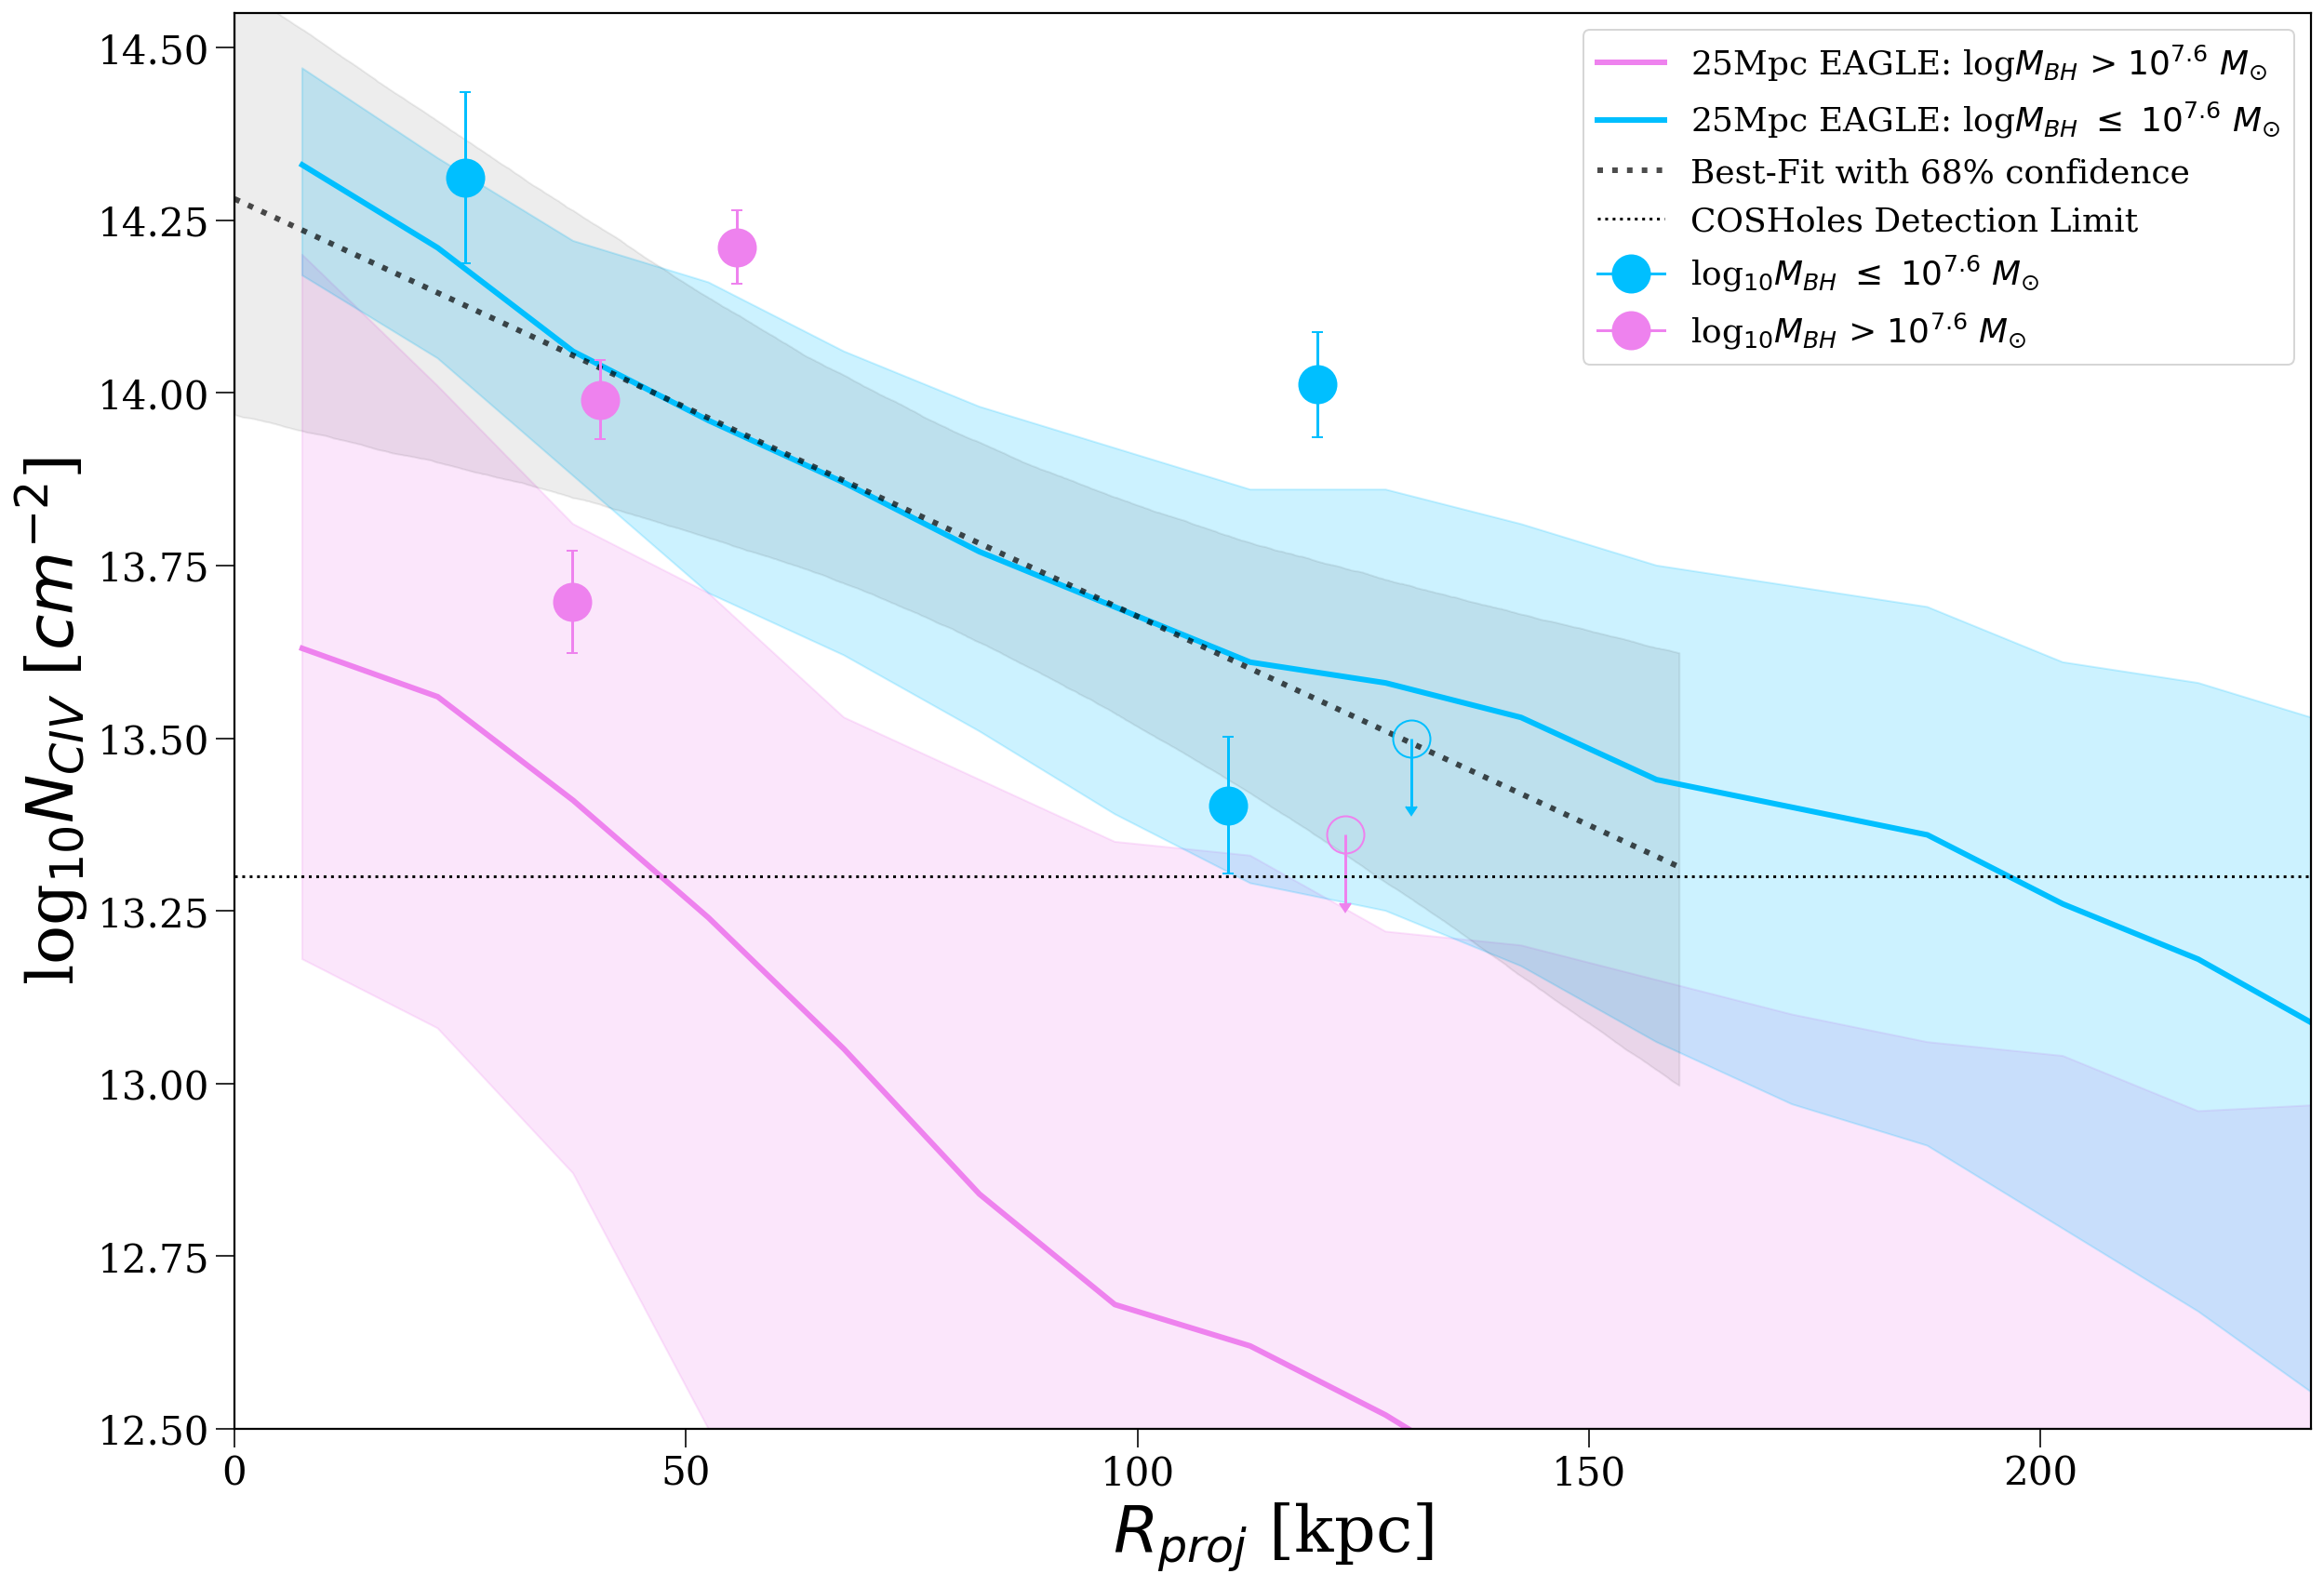

In [28]:
#Linear Regression

########### Plotting Ben's Data 

plt.fill_between(b_benHbh, ben_25Hbh, ben_75Hbh, alpha = 0.2, color = 'violet')
plt.plot(b_benHbh, med_benHbh, color = 'violet', lw = 3, label = '25Mpc EAGLE: log$M_{BH}$ > $10^{7.6}$ $M_{\odot}$')
plt.fill_between(b_benLbh, ben_25Lbh, ben_75Lbh, alpha = 0.2, color = 'deepskyblue')
plt.plot(b_benLbh, med_benLbh, color = 'deepskyblue', lw = 3, label = '25Mpc EAGLE: log$M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$')

plt.plot(xx, mean_line_C, color = 'k', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit with 68% confidence')
plt.fill_between(xx, lo_line_C, hi_line_C, color = "k", alpha = 0.07)

########### Plotting COS-Holes Data

#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue', marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet', marker=".", markersize=40)
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', capsize = 3,
             marker=".", markersize=40)

#J1222 - NGC 4248 (3)
plt.errorbar (rproj[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(12.5, 14.55)
plt.xlim(0, 230)
plt.xlabel ('$R_{proj}$ [kpc]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=1)
#plt.grid(True)
plt.show()

In [29]:
#FITS INFORMATION

print('COS-HOLES CIV FITS')
print('y intercept:', mean_yint_C)
print('slope:', mean_slope_C)

COS-HOLES CIV FITS
y intercept: 14.280840692179318
slope: -0.006044937510277158


<>:21: DeprecationWarning: invalid escape sequence \l
<>:26: DeprecationWarning: invalid escape sequence \o
<>:58: DeprecationWarning: invalid escape sequence \o
<>:88: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \l
<>:26: DeprecationWarning: invalid escape sequence \o
<>:58: DeprecationWarning: invalid escape sequence \o
<>:88: DeprecationWarning: invalid escape sequence \l
<>:21: DeprecationWarning: invalid escape sequence \l
<>:26: DeprecationWarning: invalid escape sequence \o
<>:58: DeprecationWarning: invalid escape sequence \o
<>:88: DeprecationWarning: invalid escape sequence \l
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/1742971486.py:21: DeprecationWarning: invalid escape sequence \l
  capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/1742971486.py:26: DeprecationWarning: invalid escape sequence \o


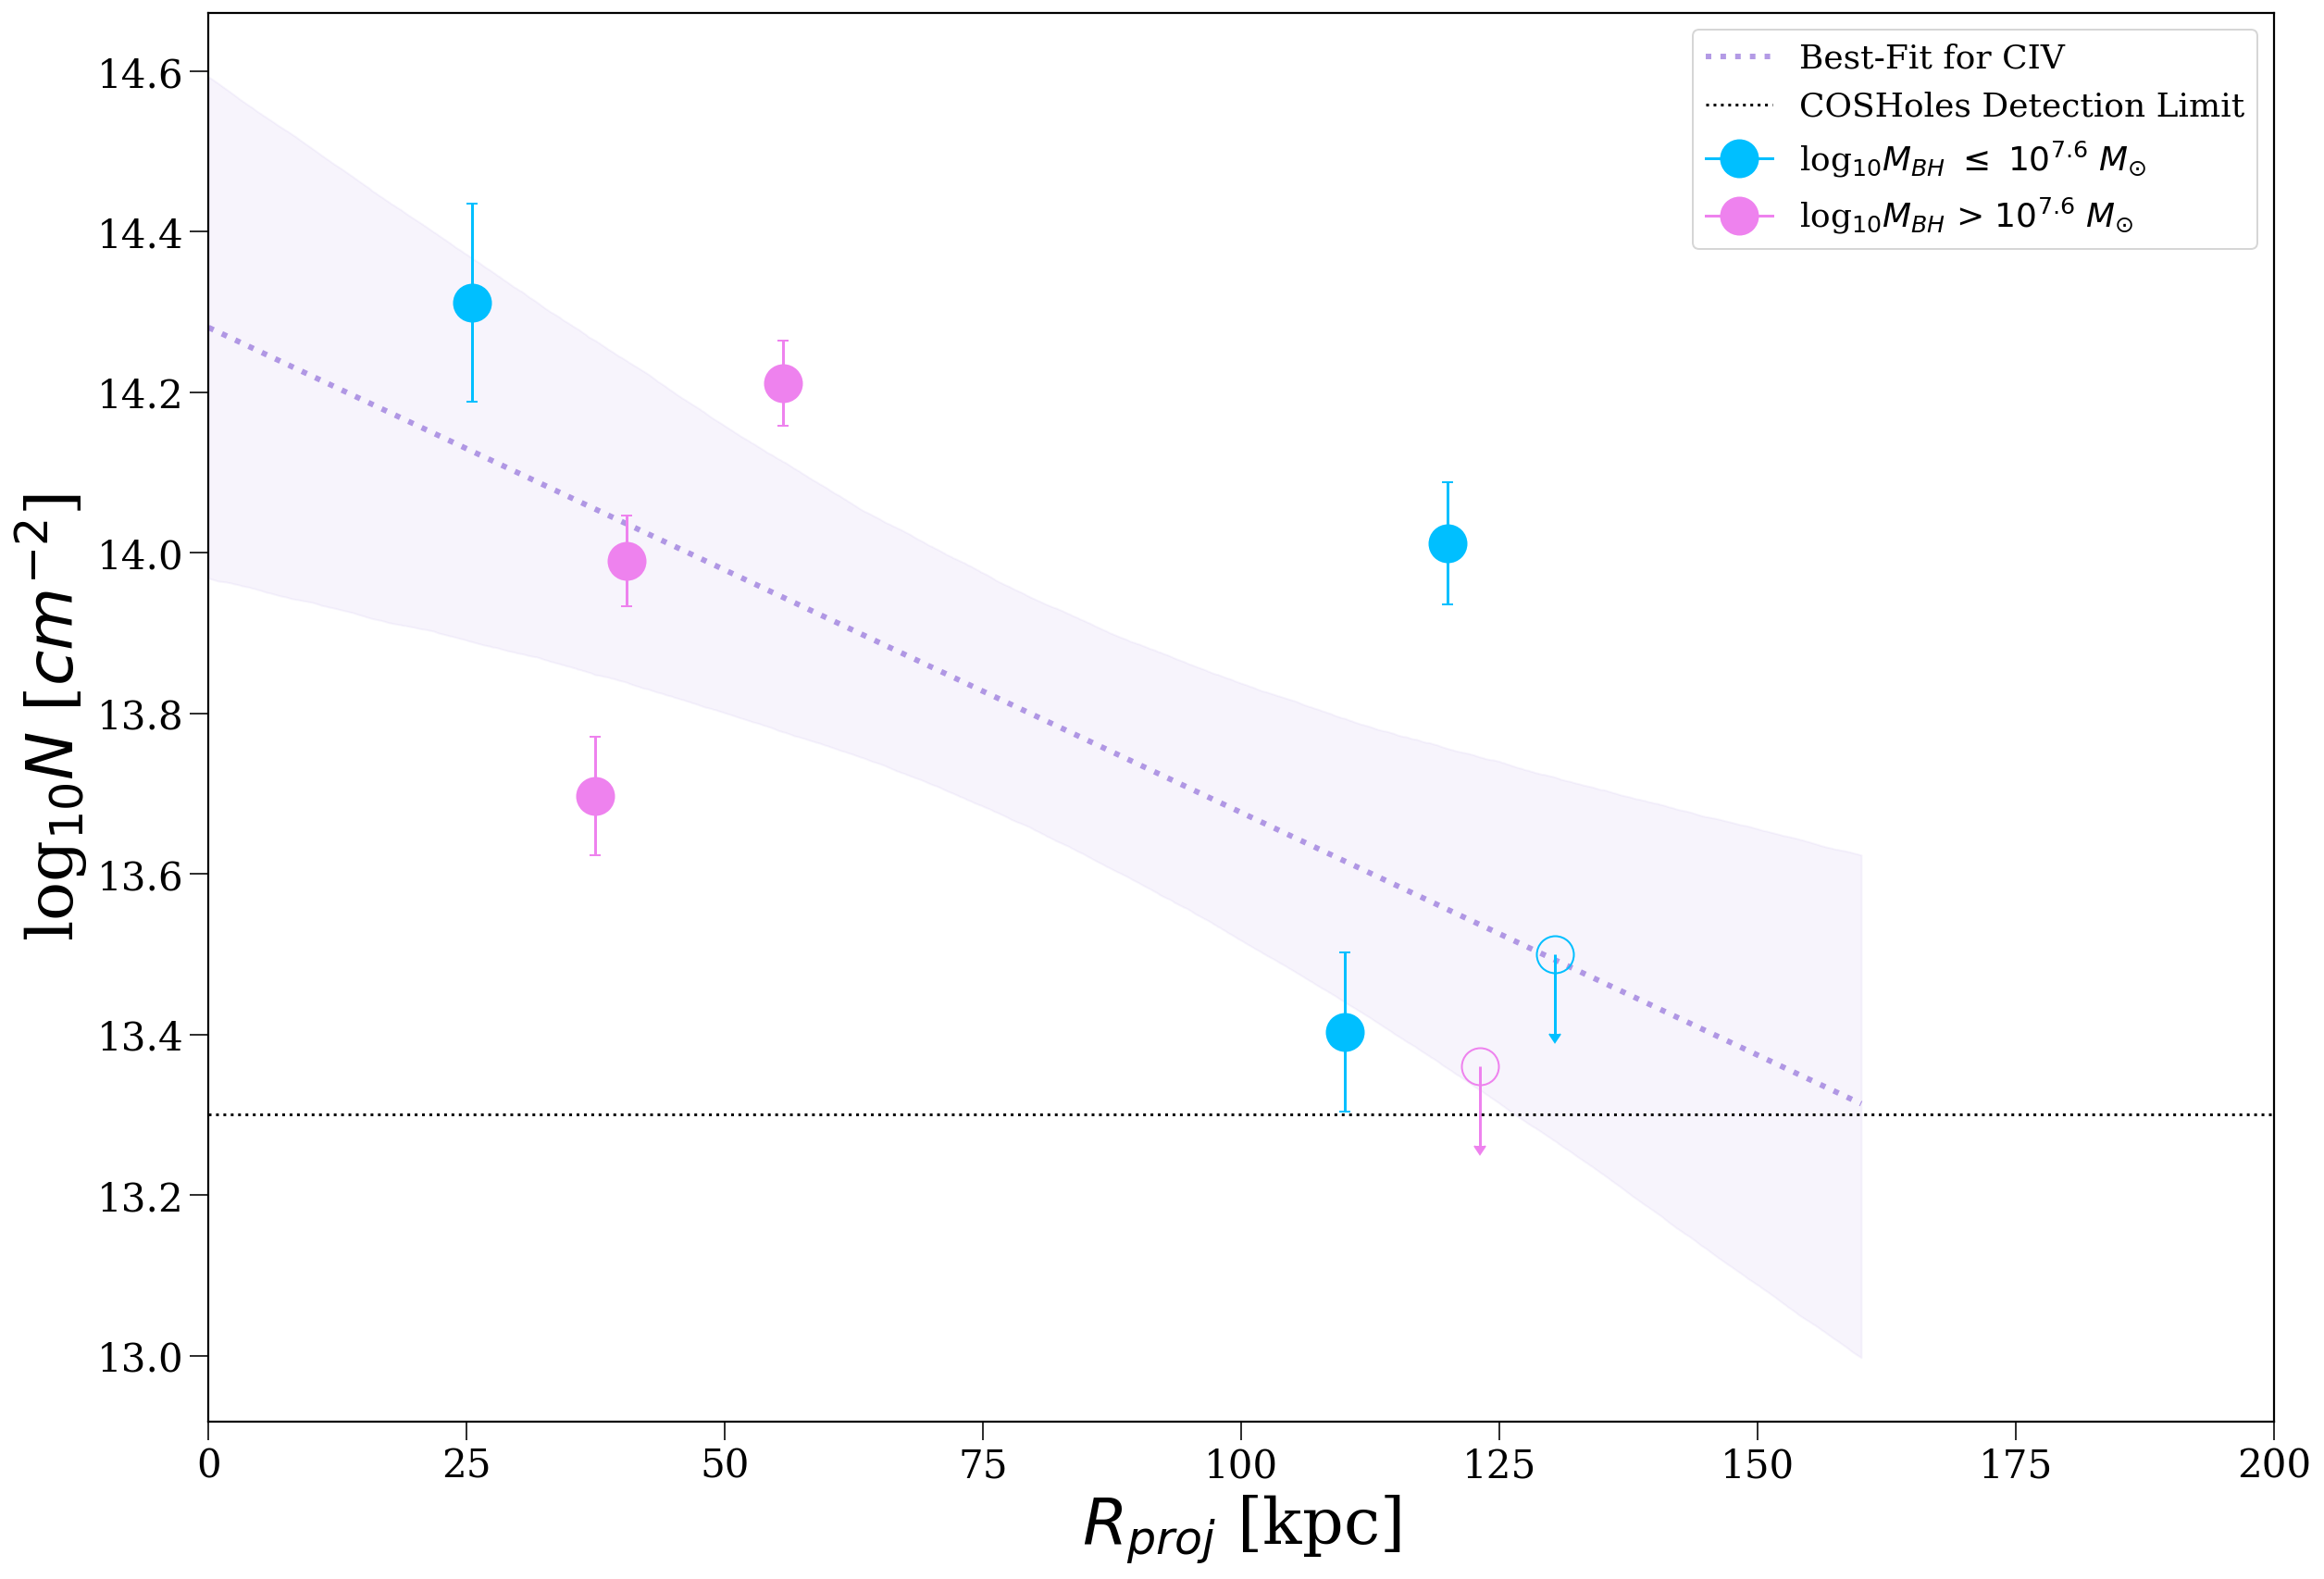

In [31]:
#Linear Regression

# CIV
plt.plot(xx, mean_line_C, color = 'mediumpurple', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit for CIV')
plt.fill_between(xx, lo_line_C, hi_line_C, color = "mediumpurple", alpha = 0.07)

#SiIV
#plt.plot(xx, mean_line_S, color = 'darkgoldenrod', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit for SIV')
#plt.fill_between(xx, lo_line_S, hi_line_S, color = "darkgoldenrod", alpha = 0.07)

########### Plotting COS-Holes Data ###########

##### CIV #####

#J1159
plt.errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue', marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet', marker=".", markersize=40)
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', capsize = 3,
             marker=".", markersize=40)

#J1222 - NGC 4248 (3)
plt.errorbar (rproj[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

'''##### SiIV #####

#DETECTIONS

#####J1159 (two features) 
plt.errorbar (rproj[1], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=20)

#####J1051 (two features)
plt.errorbar(rproj[5], siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=20)'''

##################################################################
'''
#####  NON DETECTIONS  

###### J1101
plt.errorbar(rproj[0], siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=20)

###### J1222
plt.errorbar(rproj[3], siiv_uplims[5], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             uplims=True, marker="s", mfc='none', markersize=20)

#####J1249
#SiIV
plt.errorbar(rproj[4], siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             marker="s", mfc='none', markersize=20)

#####J1123
plt.errorbar(rproj[6], siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=20)

###### J0246
plt.errorbar(rproj[7], siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=20)

#####J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=20)'''

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
#plt.ylim(12.5, 14.55)
plt.xlim(0, 200)
plt.xlabel ('$R_{proj}$ [kpc]')
plt.ylabel ('log$_{10}N$ [$cm^{-2}$]')
plt.legend(loc=1)
#plt.grid(True)
plt.show()

In [44]:
#FITS INFORMATION

print('COS-HOLES CIV FITS using Rproj')
print('y intercept:', mean_yint_C)
print('slope:', mean_slope_C)

COS-HOLES CIV FITS using Rproj
y intercept: 14.294564523191875
slope: -0.006242674449329764


<>:17: DeprecationWarning: invalid escape sequence \l
<>:22: DeprecationWarning: invalid escape sequence \o
<>:17: DeprecationWarning: invalid escape sequence \l
<>:22: DeprecationWarning: invalid escape sequence \o
<>:17: DeprecationWarning: invalid escape sequence \l
<>:22: DeprecationWarning: invalid escape sequence \o
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/2496416813.py:17: DeprecationWarning: invalid escape sequence \l
  capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/2496416813.py:22: DeprecationWarning: invalid escape sequence \o
  label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)


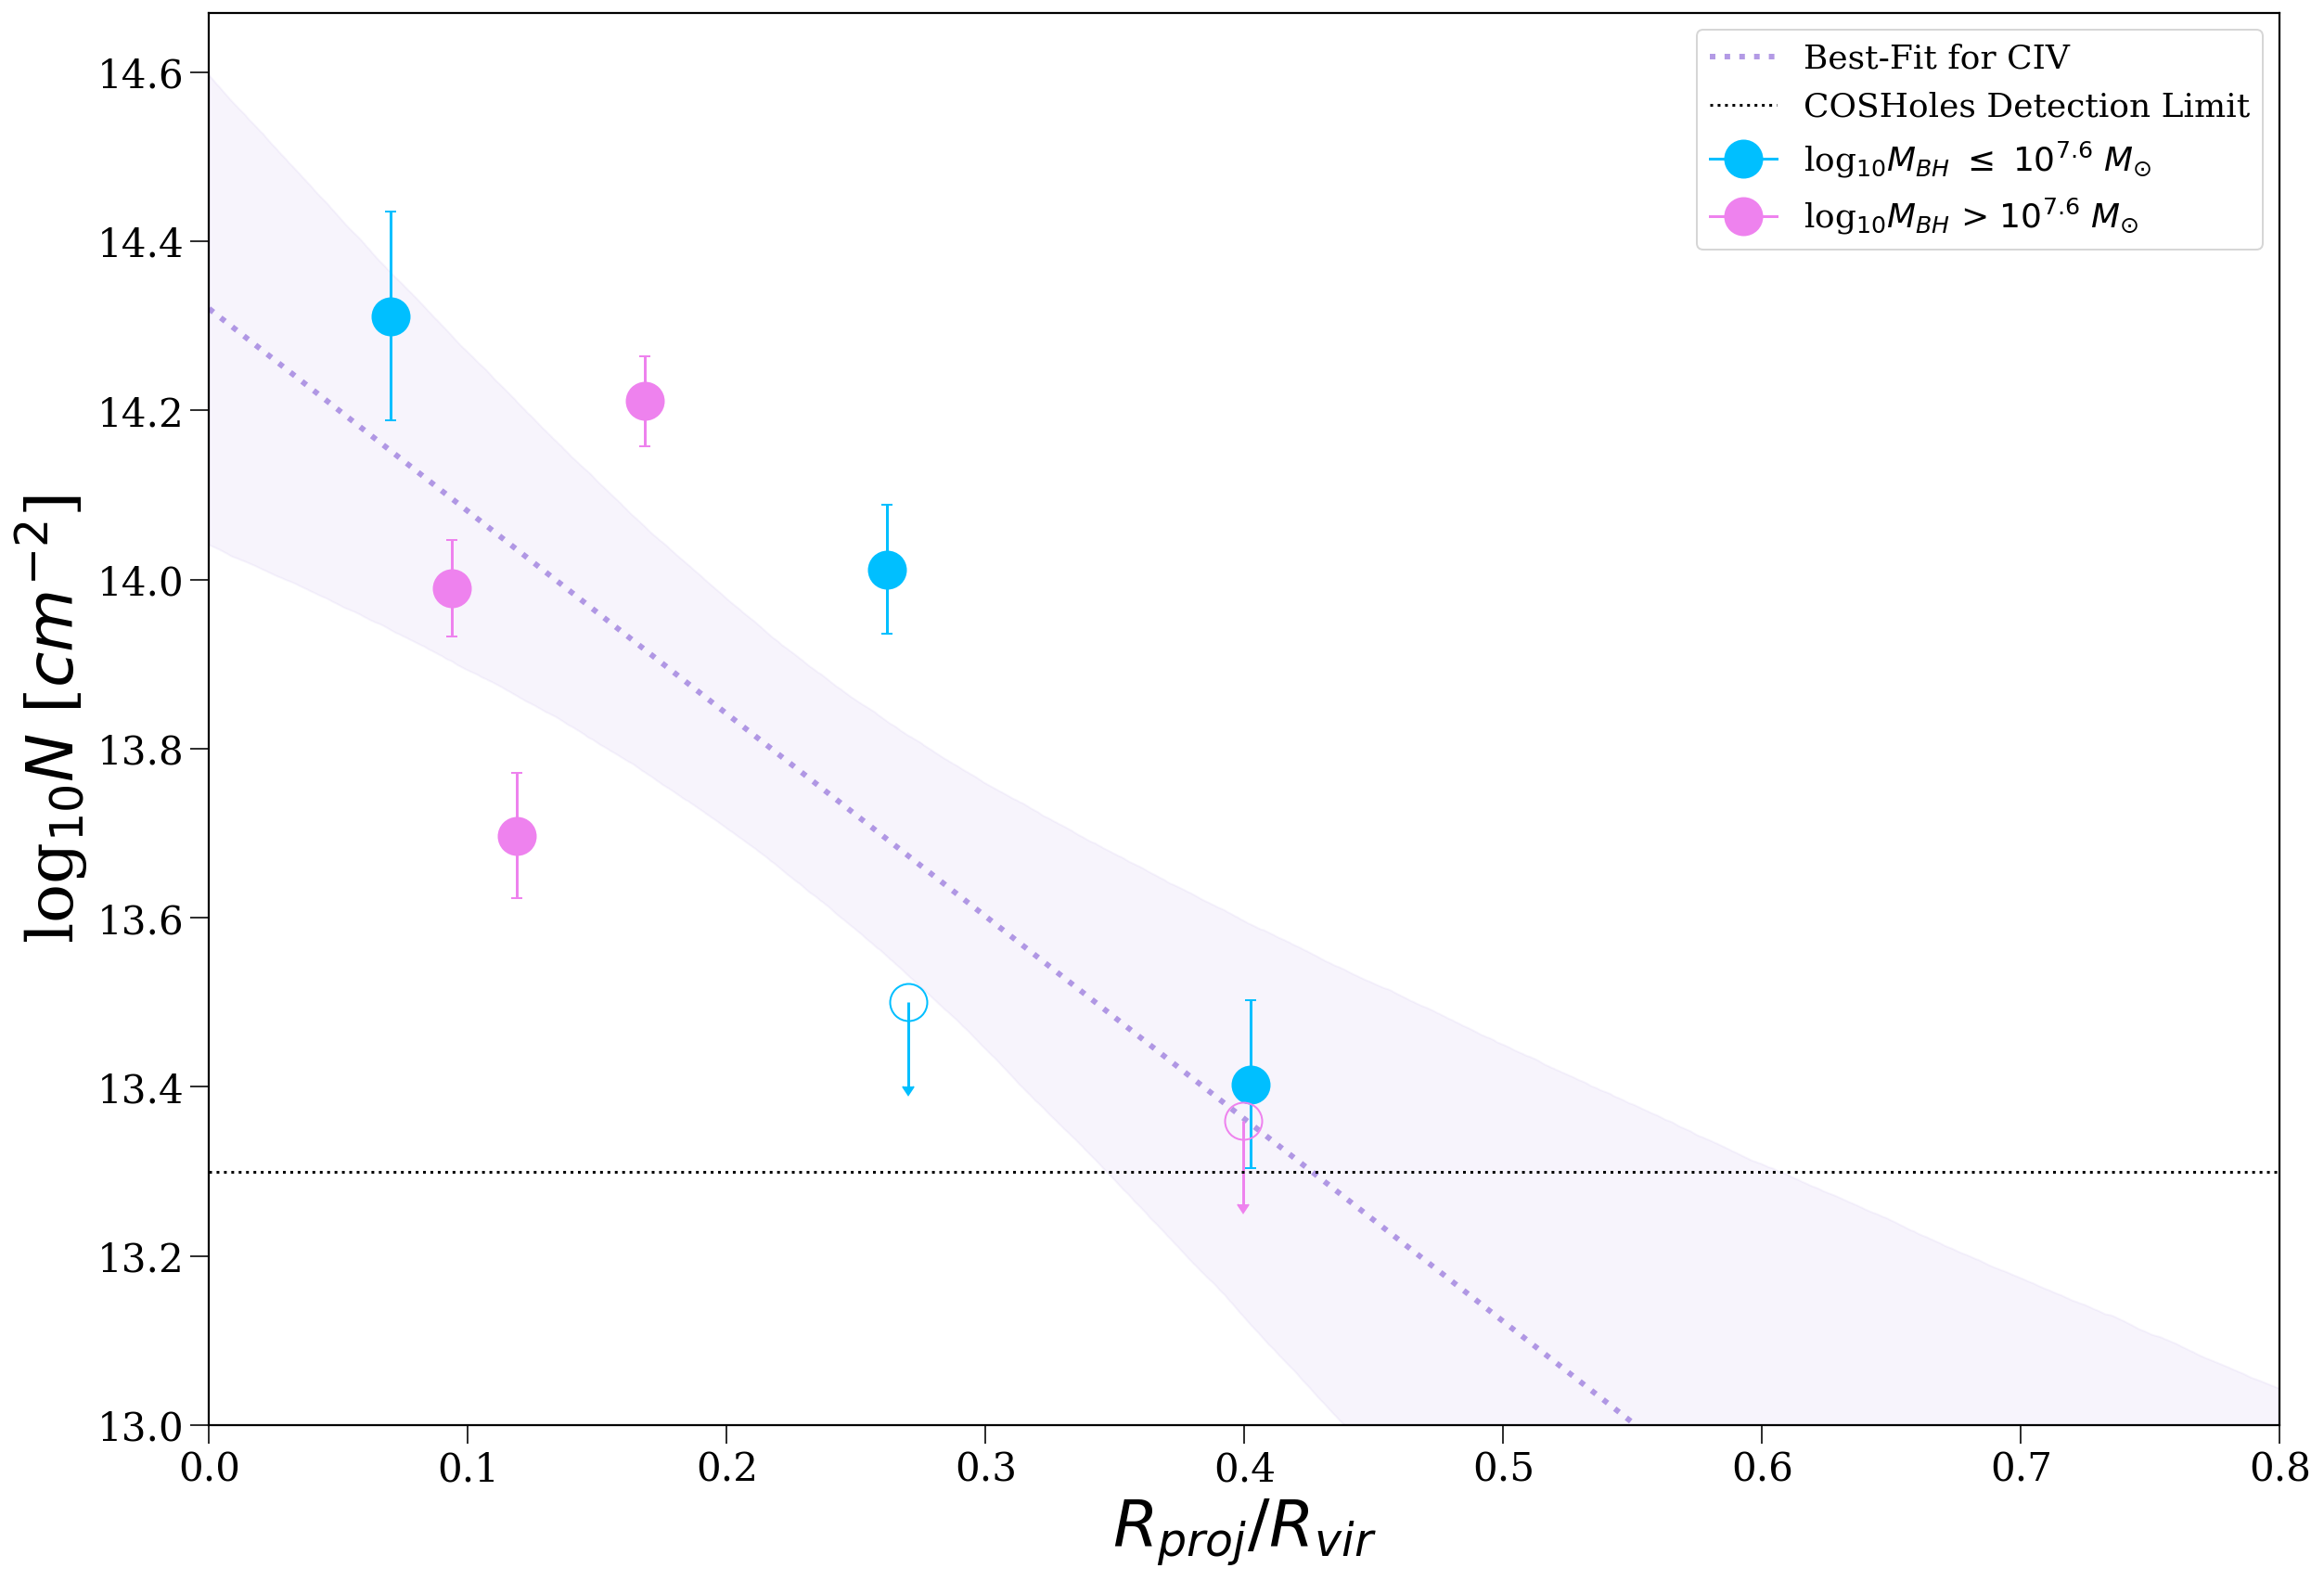

In [33]:
#Linear Regression

# CIV
plt.plot(xxrr, mean_line_Crr, color = 'mediumpurple', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit for CIV')
plt.fill_between(xxrr, lo_line_Crr, hi_line_Crr, color = "mediumpurple", alpha = 0.07)


########### Plotting COS-Holes Data ###########

#J1159
plt.errorbar(rproj[1]/rvir[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
plt.errorbar(rproj[4]/rvir[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
plt.errorbar(rproj[5]/rvir[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(rproj[6]/rvir[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(rproj[7]/rvir[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
plt.errorbar(rproj[0]/rvir[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', capsize = 3,
             marker=".", markersize=40)

#J1222 - NGC 4248 (3)
plt.errorbar (rproj[3]/rvir[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)


#J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
plt.ylim(13, 14.67)
plt.xlim(0, 0.8)
plt.xlabel ('$R_{proj}/R_{vir}$')
plt.ylabel ('log$_{10}N$ [$cm^{-2}$]')
plt.legend(loc=1)
#plt.grid(True)
plt.show()

In [42]:
#FITS INFORMATION

print('COS-HOLES CIV FITS using Rproj/Rvir')
print('y intercept:', mean_yint_Crr)
print('slope:', mean_slope_Crr)
print()

COS-HOLES CIV FITS using Rproj/Rvir
y intercept: 14.320236321680428
slope: -2.3952791046208595



<>:22: DeprecationWarning: invalid escape sequence \l
<>:27: DeprecationWarning: invalid escape sequence \o
<>:80: DeprecationWarning: invalid escape sequence \l
<>:85: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \l
<>:27: DeprecationWarning: invalid escape sequence \o
<>:80: DeprecationWarning: invalid escape sequence \l
<>:85: DeprecationWarning: invalid escape sequence \o
<>:22: DeprecationWarning: invalid escape sequence \l
<>:27: DeprecationWarning: invalid escape sequence \o
<>:80: DeprecationWarning: invalid escape sequence \l
<>:85: DeprecationWarning: invalid escape sequence \o
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/3928991833.py:22: DeprecationWarning: invalid escape sequence \l
  capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
/var/folders/cm/j7lkwsrd7jzb97p6qnw8qmgr0000gn/T/ipykernel_21375/3928991833.py:27: DeprecationWarning: invalid escape sequence \o


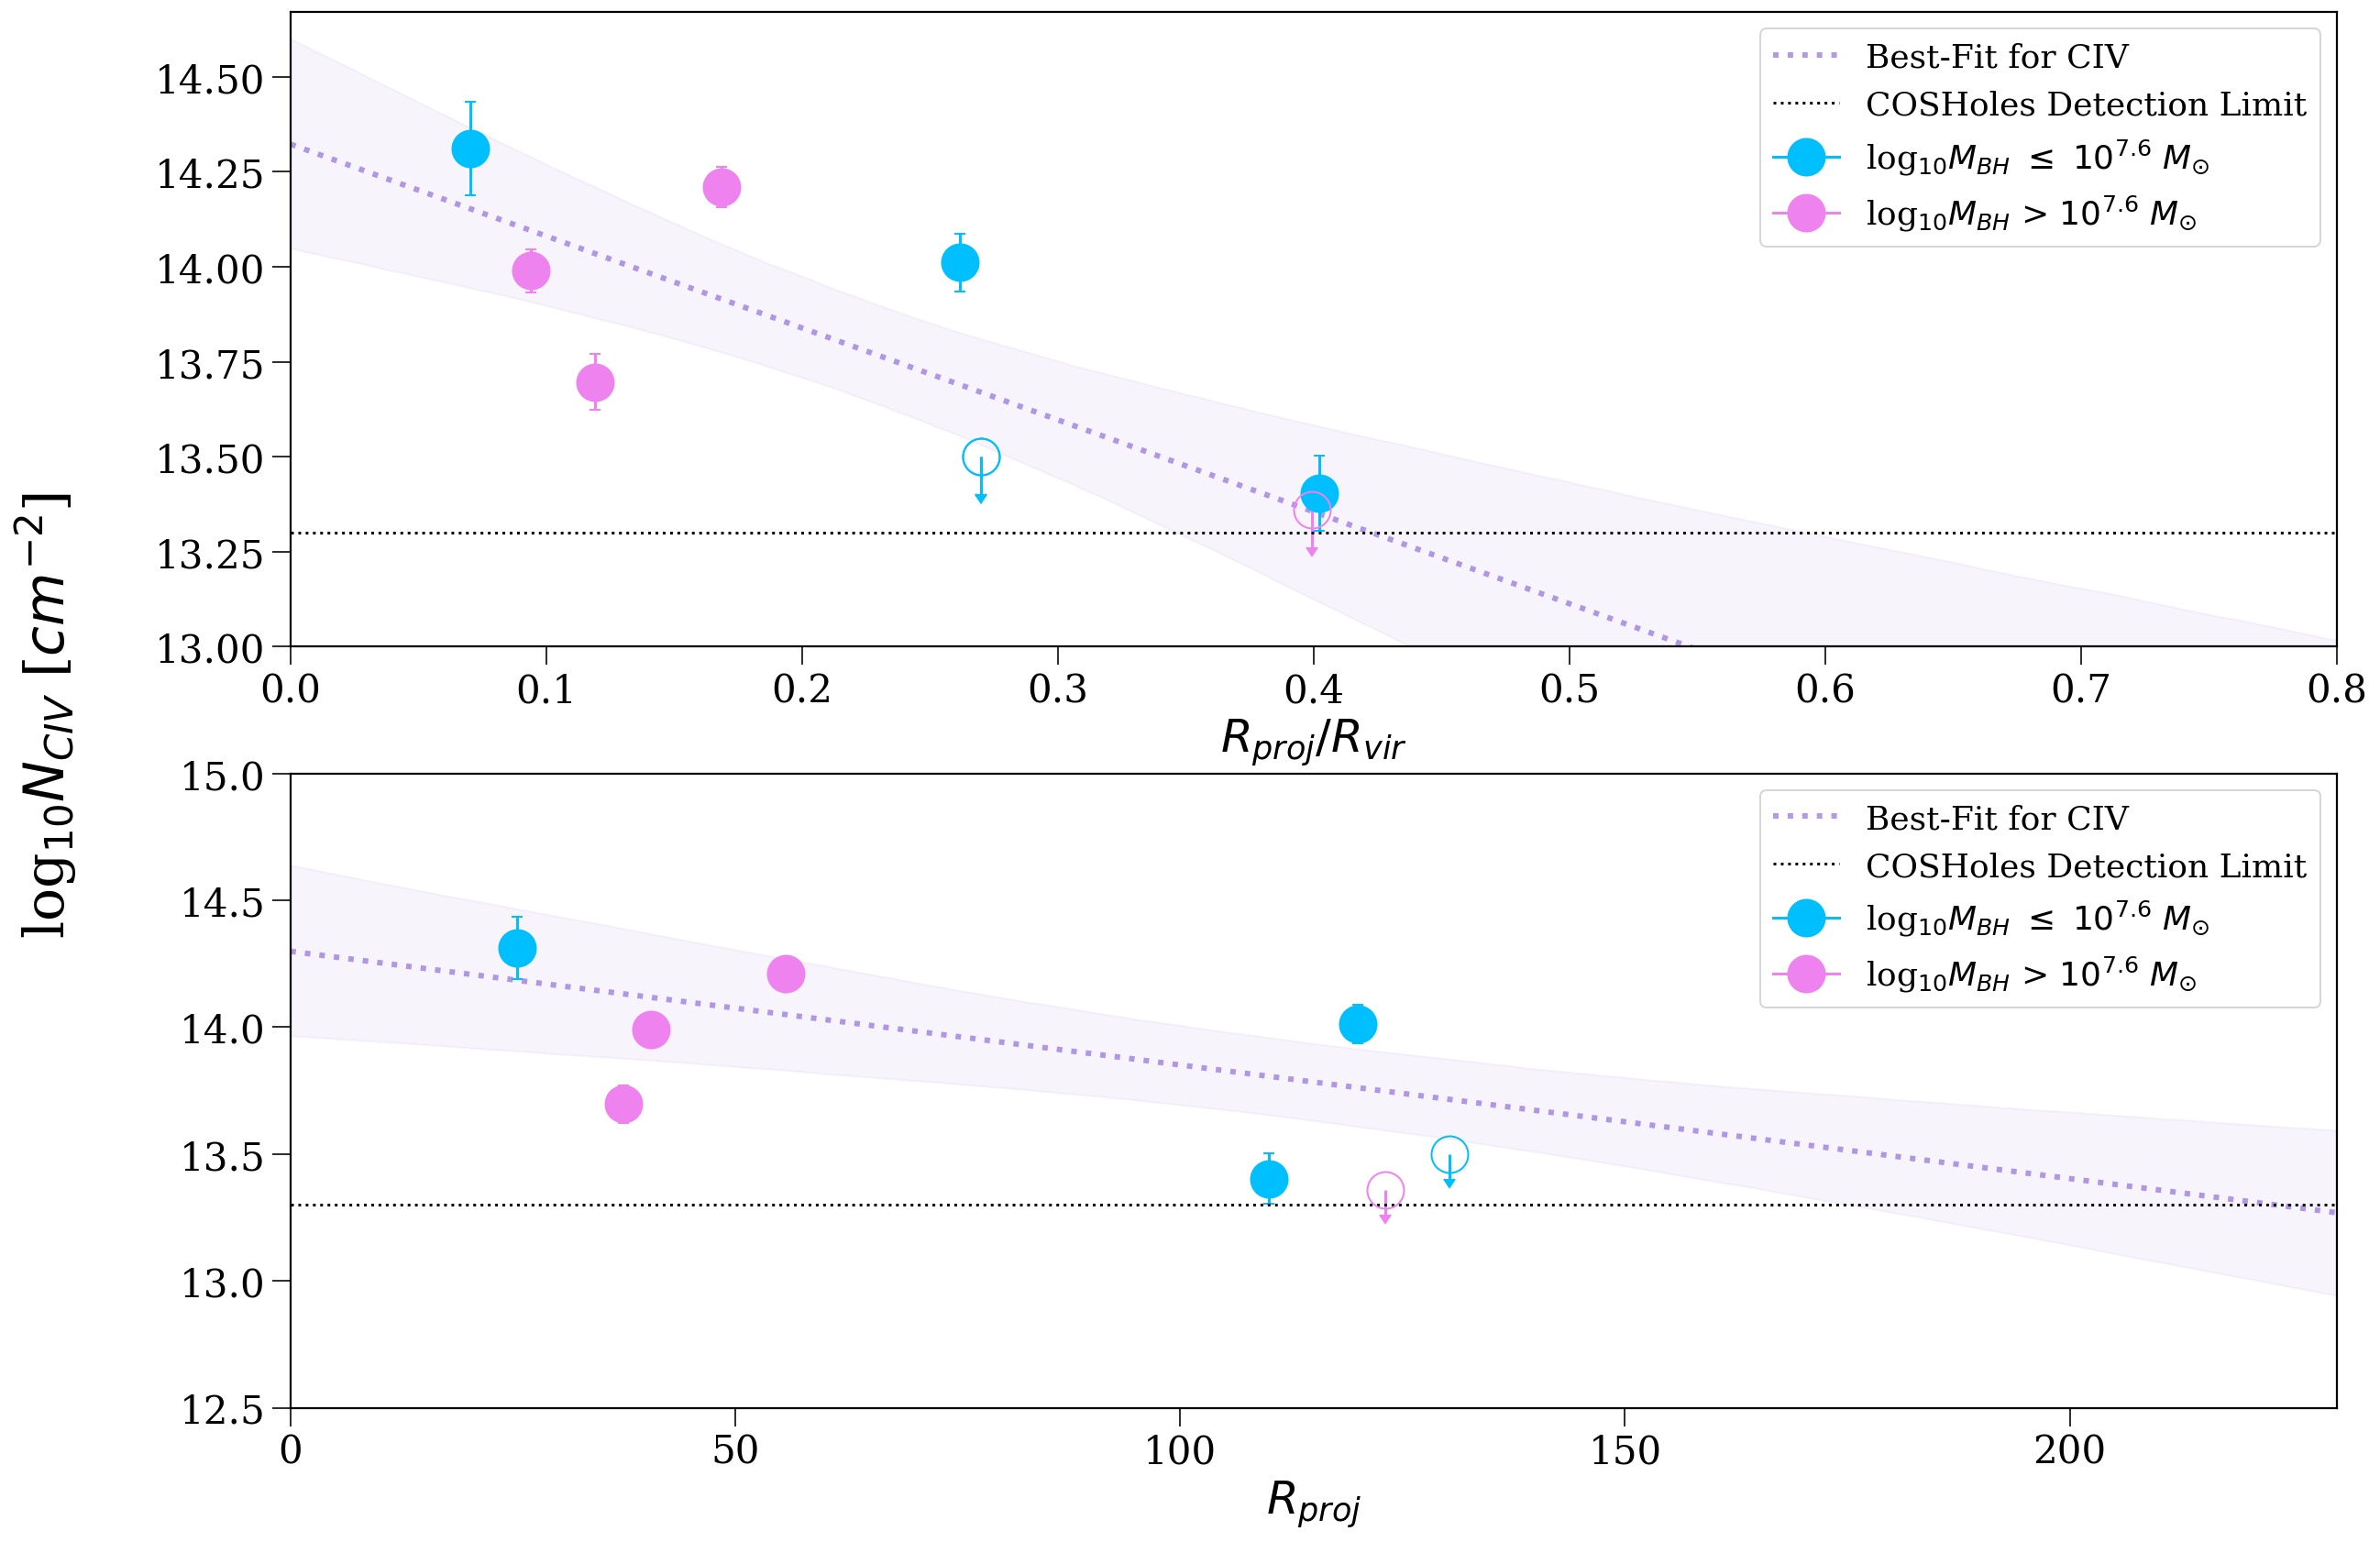

In [51]:
#This is the least automated part of the work but can make minor adjustments since the rest of this is so automated 
fig, axs = plt.subplots(2)
#handles, labels = ax.get_legend_handles_labels()
fig.supylabel('log$_{10}N_{CIV}$ [$cm^{-2}$]', fontsize=30)

################ Rproj/Rvir ##############

# CIV
axs[0].plot(xxrr, mean_line_Crr, color = 'mediumpurple', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit for CIV')
axs[0].fill_between(xxrr, lo_line_Crr, hi_line_Crr, color = "mediumpurple", alpha = 0.07)


########### Plotting COS-Holes Data ###########

#J1159
axs[0].errorbar(rproj[1]/rvir[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', 
             marker=".", markersize=40)

#J1249
axs[0].errorbar(rproj[4]/rvir[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
axs[0].errorbar(rproj[5]/rvir[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
axs[0].errorbar(rproj[6]/rvir[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
axs[0].errorbar(rproj[7]/rvir[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
axs[0].errorbar(rproj[0]/rvir[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', capsize = 3,
             marker=".", markersize=40)

#J1222 - NGC 4248 (3)
axs[0].errorbar (rproj[3]/rvir[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)


#J1235 - NGC 4564 (8)
axs[0].errorbar (rproj[8]/rvir[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

#J1222 - NGC 4248 (3)
axs[0].errorbar (rproj[3]/rvir[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

axs[0].axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
axs[0].set_ylim(13, 14.67)
axs[0].set_xlim(0, 0.8)
axs[0].set_xlabel ('$R_{proj}/R_{vir}$', fontsize=25)
#axs[0].set_ylabel ('log$_{10}N$ [$cm^{-2}$]')
axs[0].legend(loc=1)
#plt.grid(True)

############### Rproj ##############

# CIV
axs[1].plot(xx, mean_line_C, color = 'mediumpurple', lw = 3, ls = ":", alpha = 0.7, label='Best-Fit for CIV')
axs[1].fill_between(xx, lo_line_C, hi_line_C, color = "mediumpurple", alpha = 0.07)

##### CIV #####

#J1159
axs[1].errorbar(rproj[1], civ_df_J1159['N'][0], yerr=civ_df_J1159['sigN'][0], capsize = 3, c = 'violet', marker=".", markersize=40)

#J1249
axs[1].errorbar(rproj[4], np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', 
             marker=".", markersize=40)

#J1051
axs[1].errorbar(rproj[5], civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6],capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
axs[1].errorbar(rproj[6], civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2],capsize = 3, c = 'deepskyblue', marker=".", markersize=40)

#J0246
axs[1].errorbar(rproj[7], civ_df_J0246['N'][2], civ_df_J0246['sigN'][2], capsize = 3, c = 'violet', marker=".", markersize=40)

##### Upper Limits

#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT => not really for now )
axs[1].errorbar(rproj[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], c = 'deepskyblue', capsize = 3,
             marker=".", markersize=40)

#J1222 - NGC 4248 (3)
axs[1].errorbar (rproj[3], np.log10(10**13.5), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'deepskyblue', 
              marker=".",mfc='none',markersize=40)

#J1235 - NGC 4564 (8)
axs[1].errorbar (rproj[8], np.log10(10**13.36), yerr=civ_df_J1101['sigN'][4],uplims=True, c = 'violet', 
              marker=".",mfc='none',markersize=40)

axs[1].axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
axs[1].set_xlim(0,230)
axs[1].set_ylim(12.5,15)
axs[1].legend(loc=1)
axs[1].set_xlabel('$R_{proj}$', fontsize=25)
plt.show()

## Kendall's Tau 

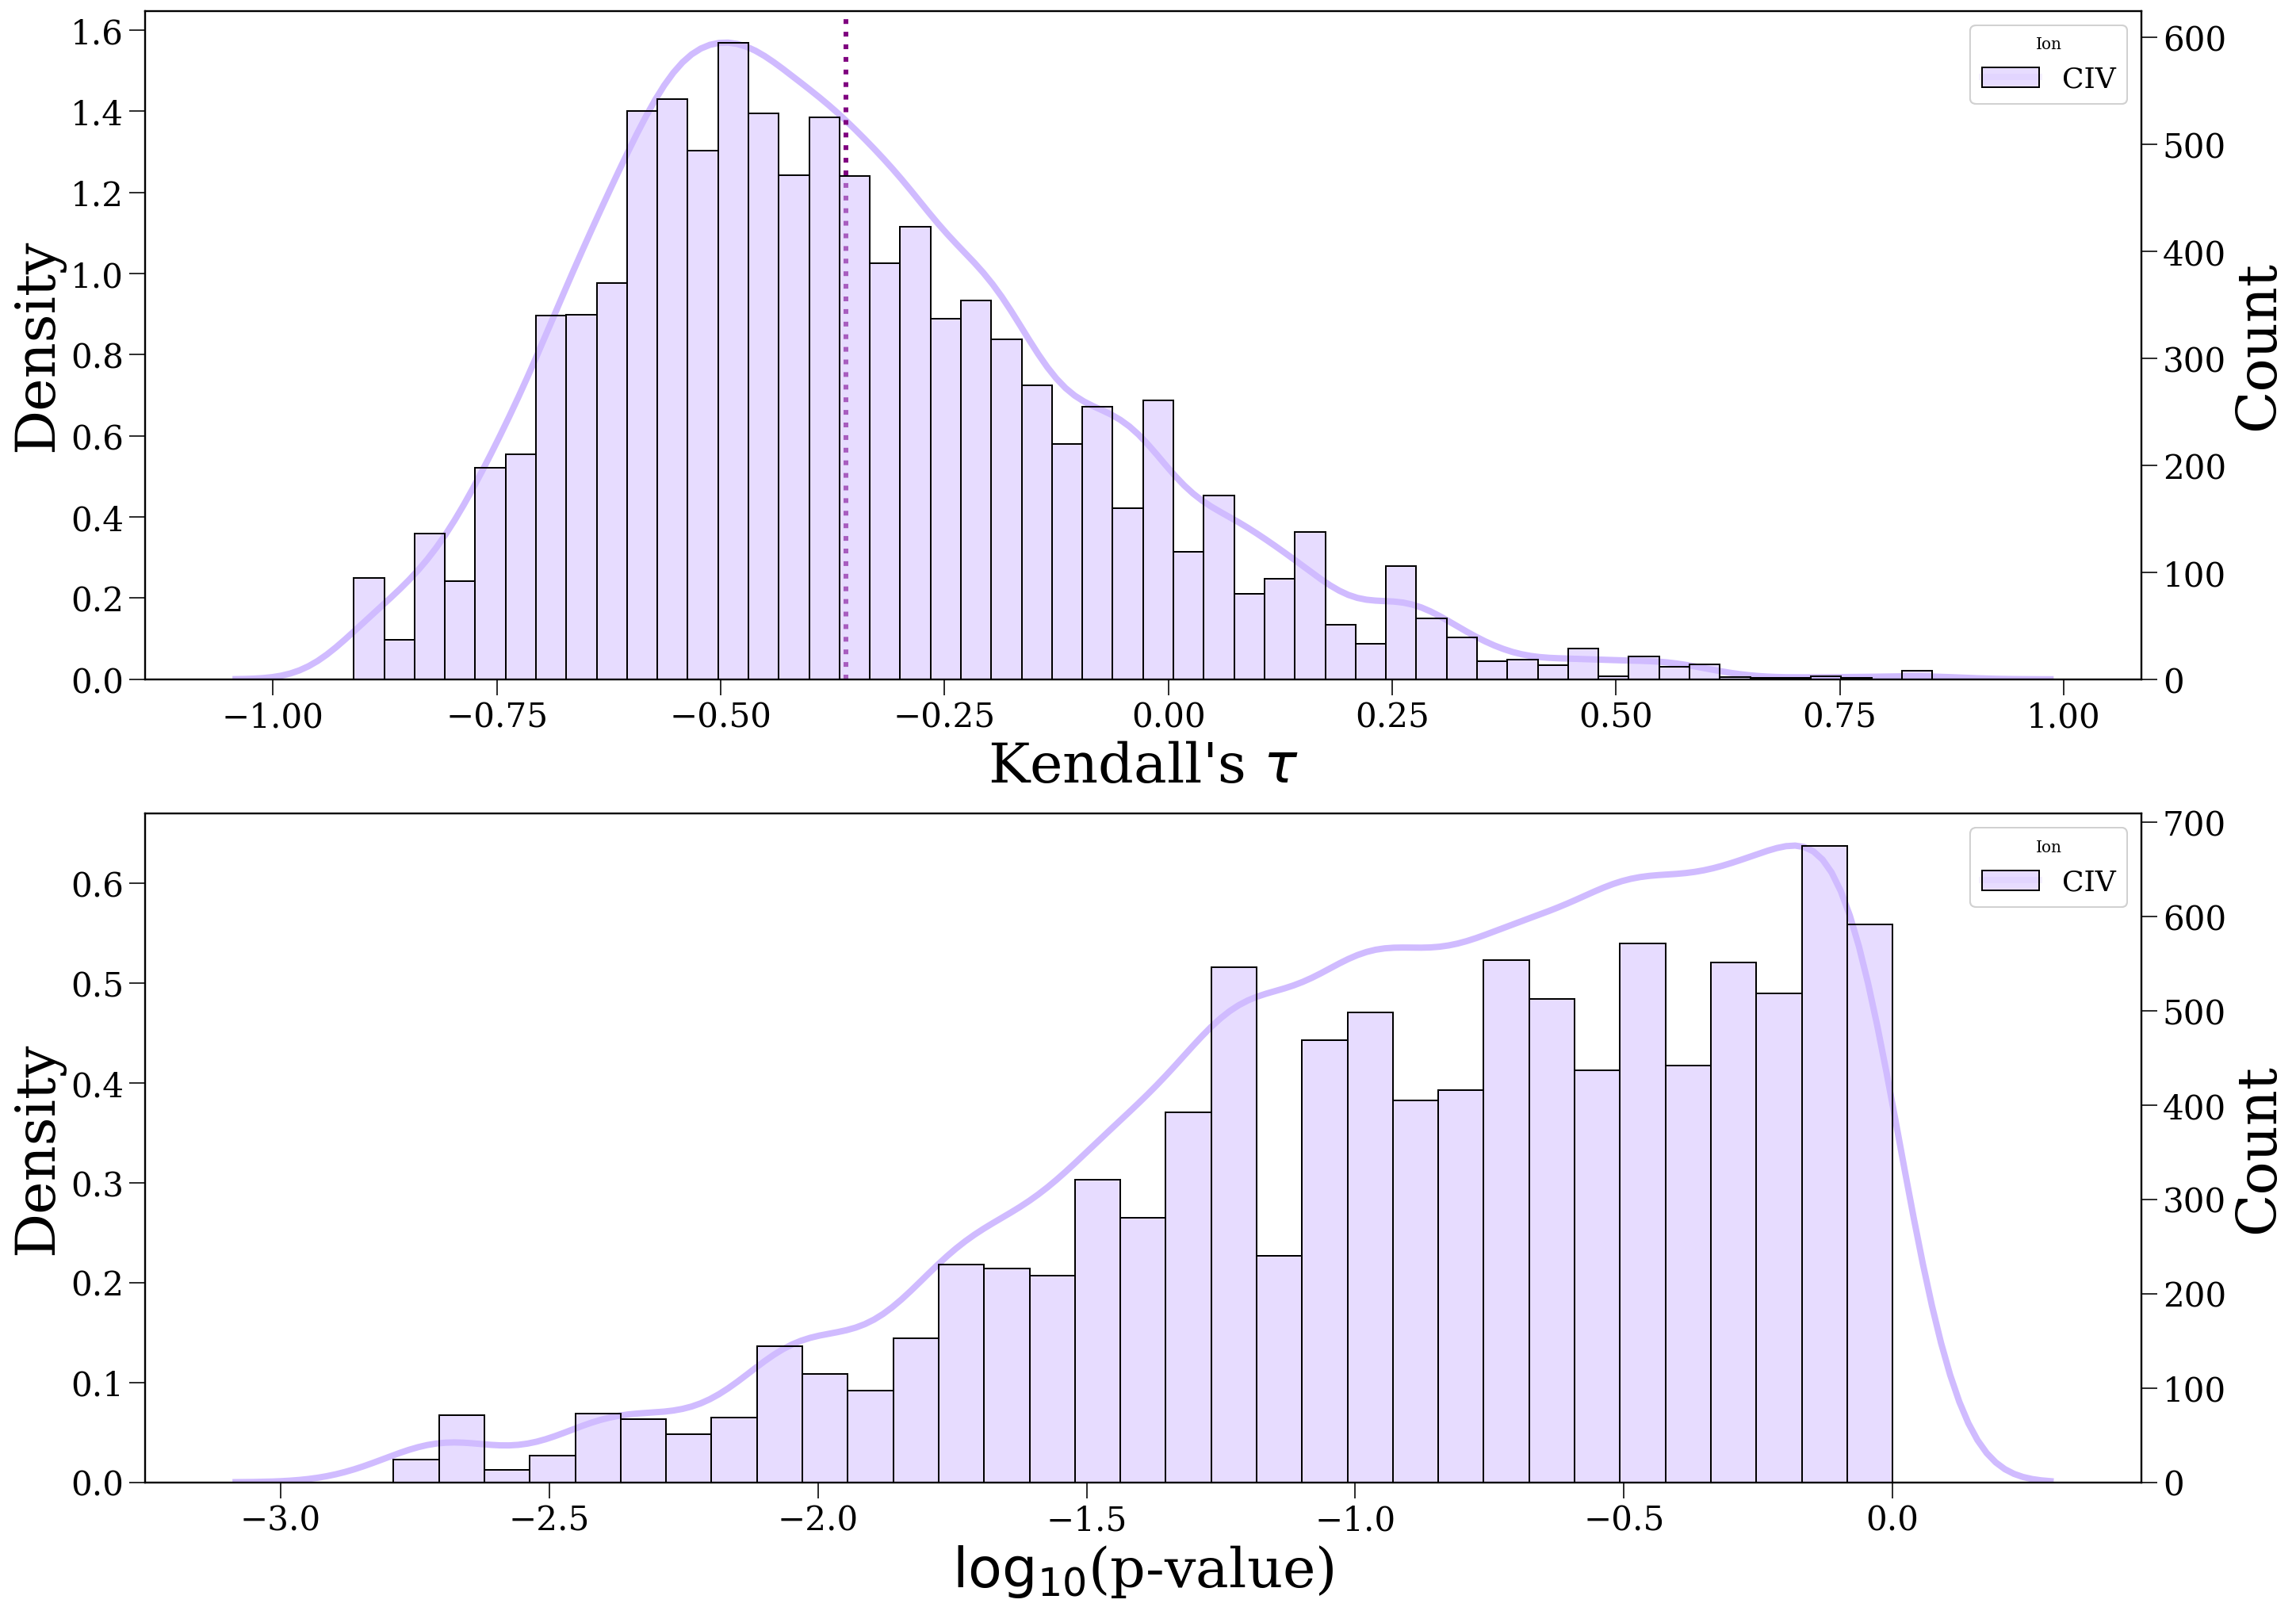

In [53]:
fig,axs = plt.subplots(2,1,constrained_layout = True)

axd = {"B":axs[0], "C":axs[1]}

palette = [pal[4]]
sns.kdeplot(data = mc_data, x = r"Kendall's $\tau$", hue = "Ion", palette = palette, ls = "-", lw = 4, ax = axd["B"])
axt = axd["B"].twinx()
sns.histplot(data = mc_data, x = r"Kendall's $\tau$", hue = "Ion", palette = palette, legend = True, ax = axt)

axd["B"].axvline(np.mean(outC['coeff_dist']), ls = ":", color = "purple", label = "Mean Tau for CIV", lw = 3)

sns.kdeplot(data = mc_data, x = r"$\log_{10}$(p-value)", hue = "Ion", palette = palette, legend = True, lw = 4, ls = "-", ax = axd["C"])
axt = axd["C"].twinx()
sns.histplot(data = mc_data, x = r"$\log_{10}$(p-value)", hue = "Ion", palette = palette, ax = axt)

plt.show()

In [54]:
#Seeing how much of the distribution is less than the given significance level of 0.0
# based on this I am pretty sure that we CANNOT reject the null hypothesis
np.sum(outC["p-value_dist"]<0.05)/len(outC["p-value_dist"])

0.2478

In [55]:
np.mean(outC['coeff_dist'])

-0.36025536868866537

In [56]:
np.log10(np.mean(outC['p-value_dist']))

-0.567009267223865

### Using the Rproj/Rvir

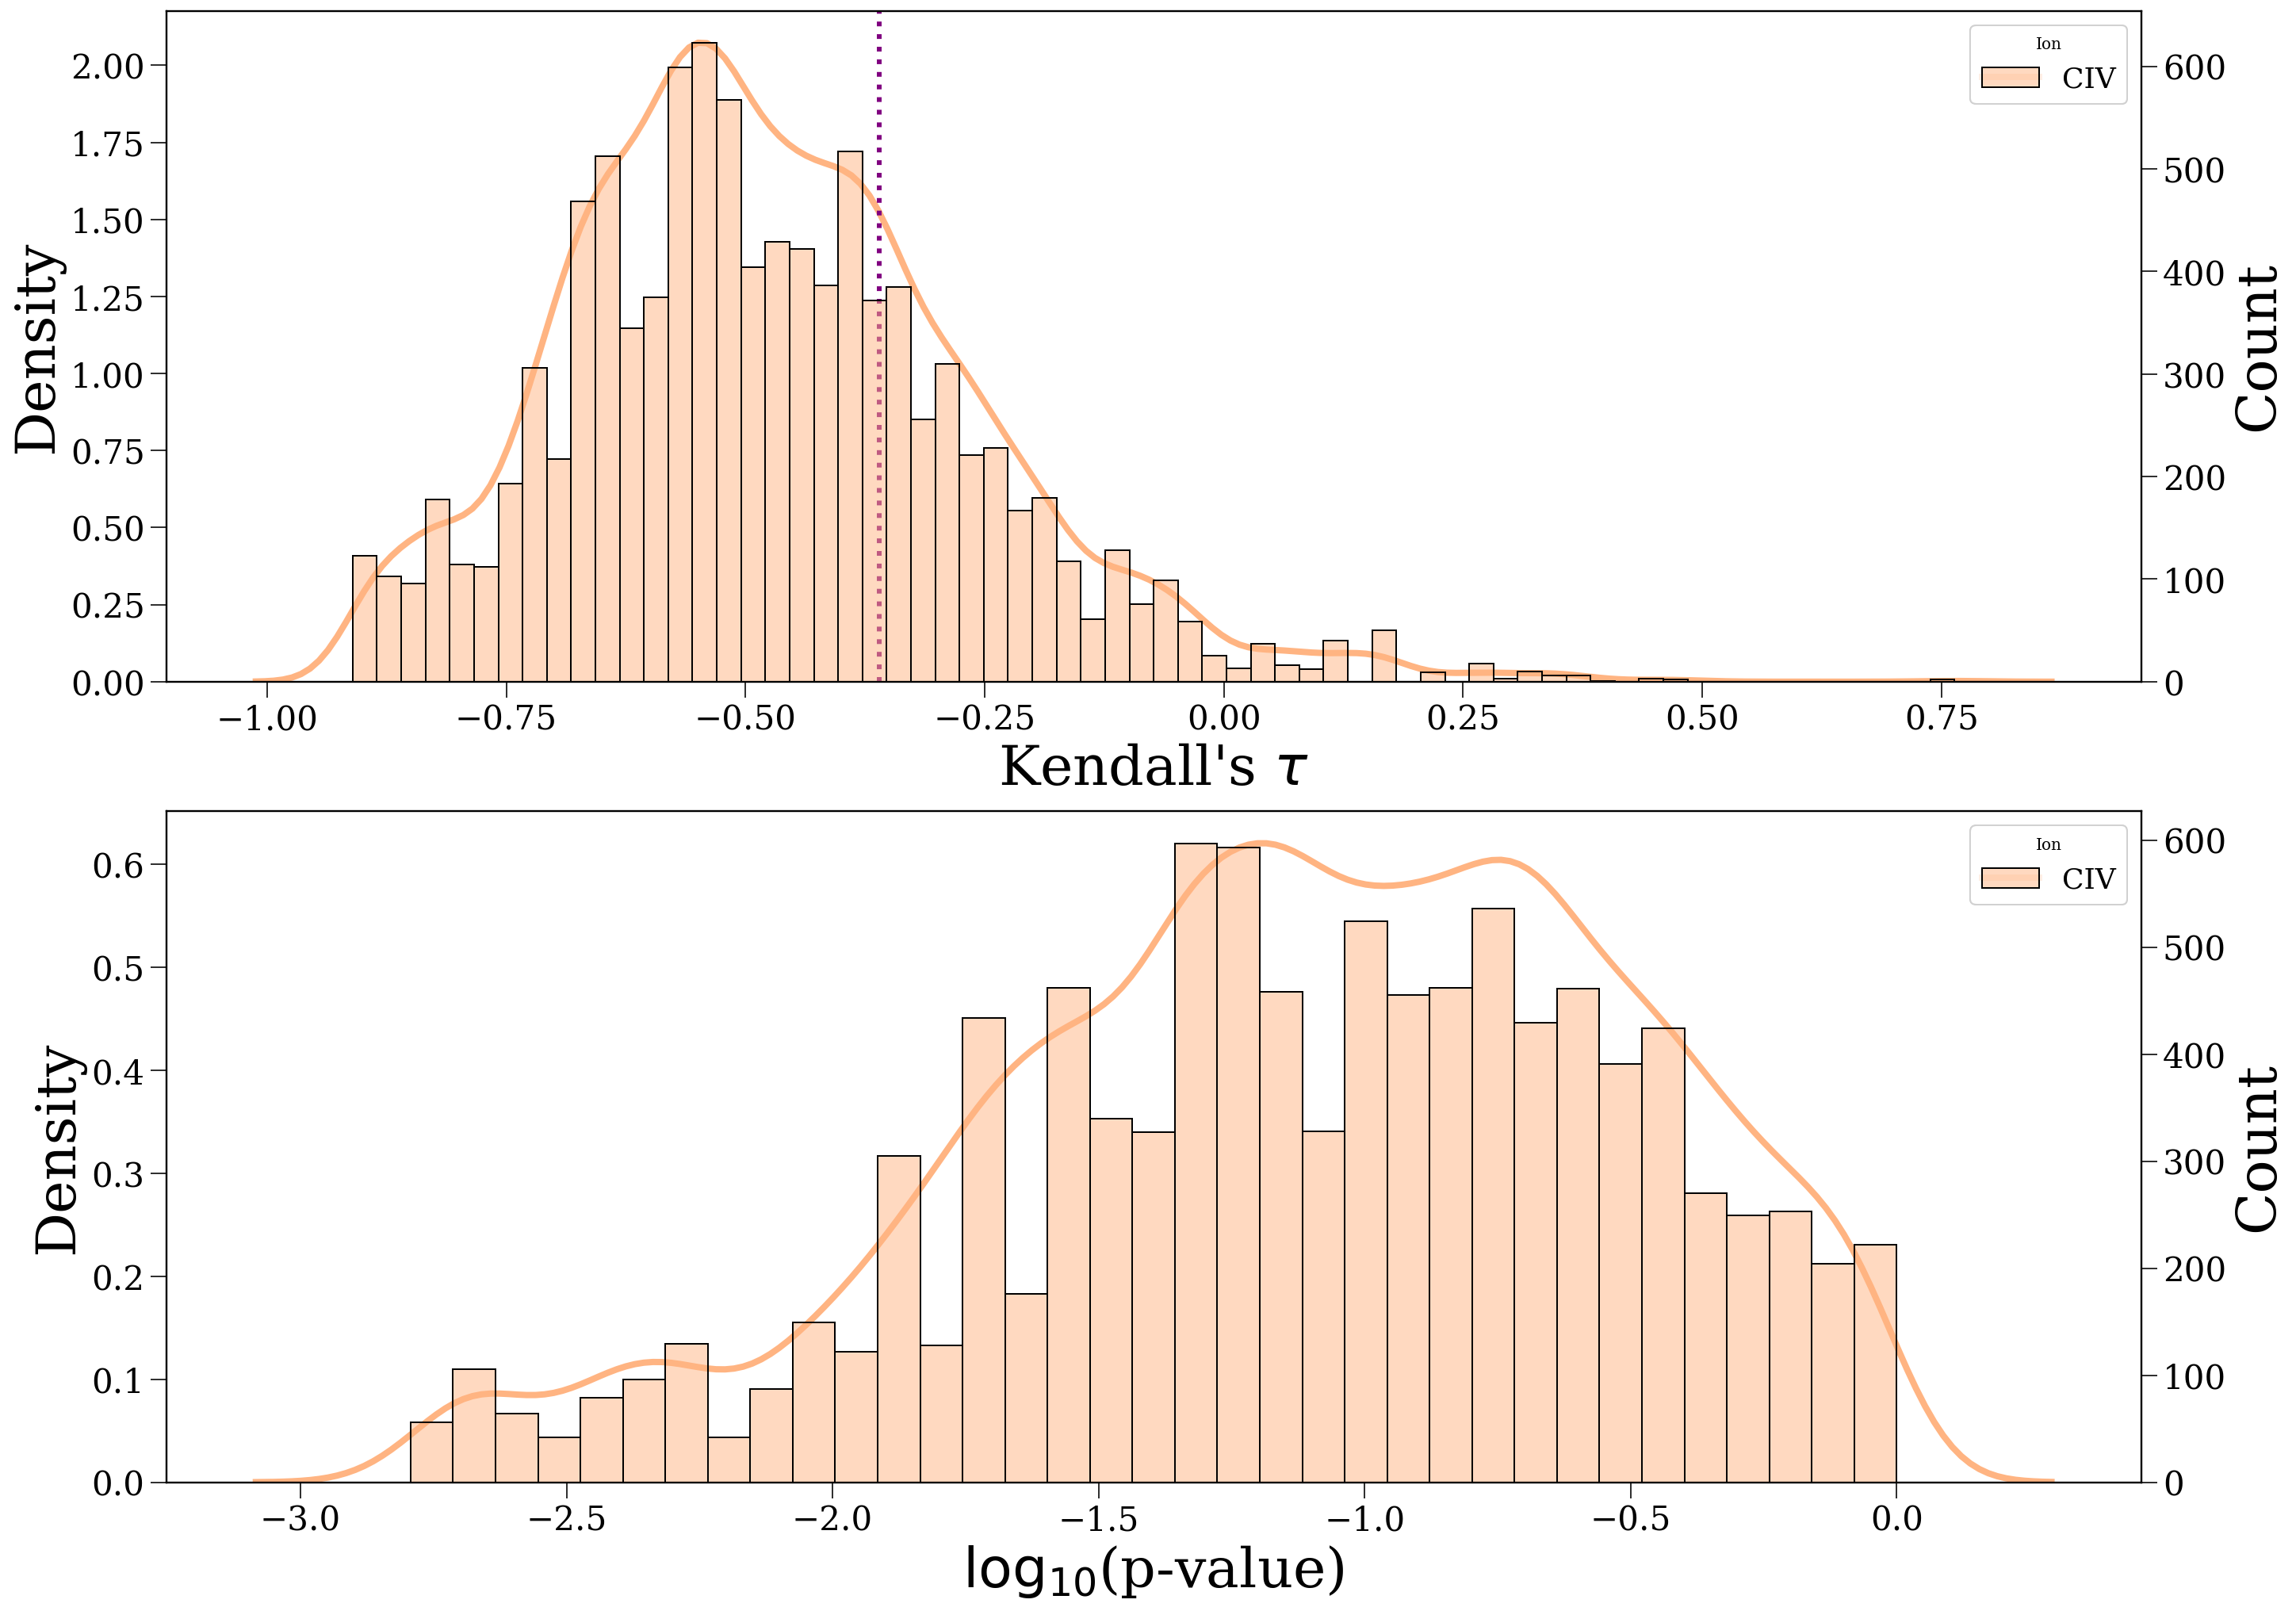

In [57]:
fig,axs = plt.subplots(2,1,constrained_layout = True)

axd = {"B":axs[0], "C":axs[1]}

palette = [pal[1]]
sns.kdeplot(data = mc_datarr, x = r"Kendall's $\tau$", hue = "Ion", palette = palette, ls = "-", lw = 4, ax = axd["B"])
axt = axd["B"].twinx()
sns.histplot(data = mc_datarr, x = r"Kendall's $\tau$", hue = "Ion", palette = palette, legend = True, ax = axt)

axd["B"].axvline(np.mean(outC['coeff_dist']), ls = ":", color = "purple", label = "Mean Tau for CIV", lw = 3)

sns.kdeplot(data = mc_datarr, x = r"$\log_{10}$(p-value)", hue = "Ion", palette = palette, legend = True, lw = 4, ls = "-", ax = axd["C"])
axt = axd["C"].twinx()
sns.histplot(data = mc_datarr, x = r"$\log_{10}$(p-value)", hue = "Ion", palette = palette, ax = axt)

plt.show()

In [60]:
#Seeing how much of the distribution is less than the given significance level of 0.0
# based on this I am pretty sure that we CANNOT reject the null hypothesis
np.sum(outCrr["p-value_dist"]<0.05)/len(outCrr["p-value_dist"])

0.359

In [61]:
np.mean(outCrr['coeff_dist'])

-0.4753495371019122

In [62]:
np.log10(np.mean(outCrr['p-value_dist']))

-0.7712206784864002

## Anderson-Darling KSamp and Wilcox Stat Tests

https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson_ksamp.html

Returns:
- resAnderson_ksampResult
    - An object containing attributes:

    - statisticfloat
        - Normalized k-sample Anderson-Darling test statistic.

    - critical_valuesarray
        - The critical values for significance levels 25%, 10%, 5%, 2.5%, 1%, 0.5%, 0.1%.

    - pvaluefloat
        - The approximate p-value of the test. The value is floored / capped at 0.1% / 25%.
        
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

An object with the following attributes.
- statisticarray_like
    - If alternative is “two-sided”, the sum of the ranks of the differences above or below zero, whichever is smaller. Otherwise the sum of the ranks of the differences above zero.

- pvaluearray_like
    - The p-value for the test depending on alternative and method.

- zstatisticarray_like
    - When method = 'approx', this is the normalized z-statistic:

        - z = (T - mn - d) / se
        - where T is statistic as defined above, mn is the mean of the distribution under the null hypothesis, d is a continuity correction, and se is the standard error. When method != 'approx', this attribute is not available.


In [63]:
from scipy.stats import anderson_ksamp
from seaborn.algorithms import bootstrap

In [64]:
#using the bootstrap method 
civ_N = np.array(CIVDF["CIVN"])
siiv_N = np.array(SiIVDF['SiIVN'])

civ_sigN = np.array(CIVDF["CIVsigN"])
siiv_sigN = np.array(SiIVDF['SiIVsigN'])

def boot_anderson_ion(inds): #I think this makes into a sequence 
    x = civ_N[inds] + civ_sigN[inds] * np.random.randn(len(inds))
    x2 = siiv_N[inds] + siiv_sigN[inds] * np.random.randn(len(inds))
    return anderson_ksamp([x, x2])[-1]

anderson_ion = bootstrap(np.arange(len(civ_N)), func = boot_anderson_ion, nboot = 10000)
print(np.percentile(anderson_ion, (16,50,84)))

/Users/samgarza/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: p-value floored: true value smaller than 0.001
  # This is added back by InteractiveShellApp.init_path()


[0.001      0.001      0.00272439]


In [65]:
np.sum(anderson_ion < 0.05)/10000.

0.9997

In [66]:
#Just using the straight values once 
RES = anderson_ksamp([civ_N, siiv_N])
RES

Anderson_ksampResult(statistic=6.110303846585545, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001417443648707521)

I have no idea what this means but the p-value is less than 0.05 so I think they are drawn from different distributions? 

In [67]:
from scipy.stats import wilcoxon

In [68]:
diff_btw_ions = civ_N - siiv_N
diff_btw_ions

array([0.863     , 0.47614046, 0.8       , 1.76132331, 0.486     ,
       1.182     , 1.011     , 0.61      ])

In [69]:
#I am not really sure what this one does or if it something that we want to include but let me try it 

RES_wilcox = wilcoxon(diff_btw_ions)
RES_wilcox

WilcoxonResult(statistic=0.0, pvalue=0.0078125)